# Arno's Engram key layout

The [Engram layout](https://github.com/binarybottle/engram-layout) is a keyboard layout optimized for comfortable touch typing in English created by [Arno Klein](https://binarybottle.com), with open source code to create other optimized key layouts.

             Y  G  U  K            B  L  D  F
             I  O  E  A            R  T  S  N
             V  Z  X  C            H  W  P  M

For the letter keys, the Shift key accesses capitals, and for the number keys, the Shift key access similar-looking characters. The remaining keys group similiar punctuation marks, accessed by the Shift and Ctrl keys:

          ~  |  =  <  +   $    @   >  &  %  *  `  \
          #  1  2  3  4   5    6   7  8  9  0  ^  /   Caps

    Tab      Y  G  U  K  '-/  "_\  B  L  D  F  Q  |`  -_
    Back     I  O  E  A  ,;?  .:!  R  T  S  N  J      Enter
    Shift    V  Z  X  C  ([{  )]}  H  W  P  M         Shift    


# Contents
1. [Why a new key layout?](#why)
2. [How does Engram compare with other key layouts?](#scores)
3. [Factors used to compute the Engram layout](#factors)
4. [Guiding criteria](#criteria)
5. [Summary of steps and results](#summary)
6. Setup:
    - [Dependencies and functions](#import)
    - [Speed matrix](#speed)
    - [Strength matrix](#strength)
    - [Flow matrix](#flow)
7. Steps:
    - [Step 1: Define the shape of the key layout to minimize lateral finger movements](#step1)
    - [Step 2: Assign command shortcut letters to the bottom left row](#step2)
    - [Step 3: Arrange the most frequent letters based on comfort and bigram frequencies](#step3)
    - [Step 4: Optimize assignment of the remaining letters](#step4)
    - [Step 5: Arrange non-letter characters in easy-to-remember places](#step5)
8. [Full comparison with other common key layouts](#comparison)

## Why a new key layout? <a name="why">

**Personal history** <br>
In the future, I hope to include an engaging rationale for why I took on this challenge.
Suffice to say I love solving problems, and I have battled repetitive strain injury 
ever since I worked on an old DEC workstation at the MIT Media Lab while composing 
my thesis back in the 1990s.
I have experimented with a wide variety of human interface technologies over the years --
voice dictation, one-handed keyboard, keyless keyboard, foot mouse, and ergonomic keyboards 
like the Kinesis Advantage and Ergodox keyboards with different key switches.
While these technologies can significantly improve comfort and reduce strain, 
an optimized key layout can only help when typing on ergonomic or standard keyboards. 

I have used different key layouts (Qwerty, Dvorak, Colemak, etc.)
for communications and for writing and programming projects,
and have primarily relied on Colemak for the last 10 years. 
**I find that most to all of these key layouts:**

- Demand too much strain on tendons
    - *strenuous lateral extension of the index and little fingers*
- Ignore the ergonomics of the human hand
    - *different finger strengths*
    - *different finger lengths*
    - *natural roundedness of the hand*
    - *home row easier than upper row for shorter fingers*
    - *home row easier than lower row for longer fingers*
    - *ease of little-to-index finger rolls vs. reverse*
- Over-emphasize alternation between hands and under-emphasize same-hand, different-finger transitions
    - *same-row, adjacent finger transitions are easy and comfortable*
    - *little-to-index finger rolls are easy and comfortable*

While I used ergonomic principles outlined below and the accompanying code to help generate the Engram layout,
I also relied on massive bigram frequency data for the English language. 
if one were to follow the procedure below and use a different set of bigram frequencies for another language or text corpus,
they could create a variant of the Engram layout, say "Engram-French", better suited to the French language.
    
**Why "Engram"?** <br>
The name is a pun, referring both to "n-gram", letter permutations and their frequencies that are used to compute the Engram layout, and "engram", or memory trace, the postulated change in neural tissue to account for the persistence of memory, as a nod to my attempt to make this layout easy to remember.

## How does Engram compare with other key layouts? <a name="scores">

Despite the fact that the Engram layout was designed to reduce strain and discomfort, not specifically to increase speed or reduce finger travel from the home row, it scores higher than all other key layouts (Colemak, Dvorak, QWERTY, etc.) for some large, representative, publicly available data (all text sources are listed below and available on [GitHub](https://github.com/binarybottle/text_data)). Below are tables of different prominent key layouts scored using the Engram Scoring Model (detailed below), and generated by the online [Keyboard Layout Analyzer](http://patorjk.com/keyboard-layout-analyzer/):
> The optimal layout score is based on a weighted calculation that factors in the distance your fingers moved (33%), how often you use particular fingers (33%), and how often you switch fingers and hands while typing (34%).
 

#### Engram Scoring Model scores for existing layouts based on publicly available text data
    
| Layout | Google bigrams | Alice | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 0.02483 | 0.01933 | 0.03281 | 0.02958 | 0.02770 | 0.01829 | 0.02468 | 0.04331 | 0.02718 |
| Halmak2.2 | 0.02465 | 0.01924 | 0.03282 | 0.02951 | 0.02765 | 0.01826 | 0.02455 | 0.04342 | 0.02705 |
| Norman | 0.02416 | 0.01899 | 0.03224 | 0.02892 | 0.02709 | 0.01798 | 0.02409 | 0.04201 | 0.02653 |
| MTGAP Shifted | 0.02426 | 0.01899 | 0.03219 | 0.02886 | 0.02722 | 0.01794 | 0.02419 | 0.04130 | 0.02624 |
| Workman | 0.02445 | 0.01906 | 0.03251 | 0.02924 | 0.02742 | 0.01804 | 0.02431 | 0.04277 | 0.02687 |
| QGMLWB | 0.02324 | 0.01830 | 0.03116 | 0.02811 | 0.02601 | 0.01738 | 0.02320 | 0.04094 | 0.02545 |
| Colemak Mod-DH | 0.02421 | 0.01876 | 0.03213 | 0.02876 | 0.02713 | 0.01783 | 0.02407 | 0.04216 | 0.02674 |
| Colemak | 0.02431 | 0.01881 | 0.03229 | 0.02888 | 0.02724 | 0.01790 | 0.02418 | 0.04221 | 0.02703 |
| ASSET | 0.02371 | 0.01831 | 0.03170 | 0.02836 | 0.02676 | 0.01743 | 0.02365 | 0.04188 | 0.02652 |
| Capewell-Dvorak | 0.02383 | 0.01860 | 0.03177 | 0.02844 | 0.02670 | 0.01768 | 0.02374 | 0.04141 | 0.02620 |
| Dvorak | 0.02363 | 0.01847 | 0.03148 | 0.02831 | 0.02640 | 0.01760 | 0.02355 | 0.04101 | 0.02596 |
| QWERTY | 0.02133 | 0.01684 | 0.02879 | 0.02580 | 0.02404 | 0.01581 | 0.02133 | 0.03793 | 0.02401 |

#### Keyboard Layout Analyzer scores for existing layouts based on publicly available text data
    
| Layout | Alice | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 67.51 | 61.20 | 55.18 | 57.10 | 61.13 | 57.10 | 34.39 | 45.91 |
| Halmak2.2 | - | - | --- | --- | --- | --- | --- | --- |
| Norman | 62.76 | - | --- | --- | --- | --- | --- | --- |
| MTGAP Shifted | 69.73 | - | --- | --- | --- | --- | --- | --- | 
| Workman | 64.78 | - | --- | --- | --- | --- | --- | --- | 
| QGMLWB | - | - | --- | --- | --- | --- | --- | --- | 
| Colemak Mod-DH | - | - | --- | --- | --- | --- | --- | --- | 
| Colemak | 65.83 | 60.67 | 54.97 | 57.04 | 61.36 | 57.04 | 31.48 | 48.65 | 
| ASSET | 64.60 | - | --- | --- | --- | --- | --- | --- | 
| Capewell-Dvorak | 63.40 | - | --- | --- | --- | --- | --- | --- | 
| Dvorak | 65.86 | 60.93 | 55.56 | 56.59 | 62.75 | 56.59 | 28.85 | 45.55 | 
| QWERTY | 53.06 | - | --- | --- | --- | --- | --- | --- | 

---
    
| Text source | Information |
| --- | --- |
| "Alice" | [Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/mN0CTbZ3) of Alice in Wonderland (Ch.1), a standard text used for comparing layouts |
| "100K tweets" | The first 100,000 tweets from: [Sentiment140 dataset](https://data.world/data-society/twitter-user-data) training data [Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.] |
| "20K tweets" | All 20,000 tweets from [Gender Classifier Data](https://www.kaggle.com/crowdflower/twitter-user-gender-classification) (Added: November 15, 2015 by CrowdFlower) |
| "MASC tweets" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/fv3Cj2zQ) of [MASC](http://www.anc.org/data/masc/corpus/) tweets (cleaned of html markup) |
| "MASC spoken" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/CvHXTg7n) of [MASC](http://www.anc.org/data/masc/corpus/) spoken transcripts (phone and face-to-face: 25,783 words) |
| "COCA blogs" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/fv3Cj2zQ) of [Corpus of Contemporary American English](https://www.english-corpora.org/coca/) [blog samples](https://www.corpusdata.org/) with hundreds of thousands of words (cleaned of html markup) |
| "Google" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/CtwvHjM5) of the [Google home page](https://google.com) (accessed 10/20/2020) |
| "Code" | [KLA analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/szdpfS3K) of the "Tower of Hanoi" (programming languages A-Z compiled from [Rosetta Code](https://rosettacode.org/wiki/Towers_of_Hanoi)) |

| Layout | Year | Website |
| --- | --- | --- |
| Engram | 2020 | https://engram.dev |
| Halmak2.2 | 2016 | https://github.com/MadRabbit/halmak |
| Norman | 2013 | https://normanlayout.info/ |
| MTGAP Shifted | 2012 | https://mathematicalmulticore.wordpress.com/category/keyboards/ |
| Workman | 2010 | https://workmanlayout.org/ | 
| QGMLWB | 2009 | http://mkweb.bcgsc.ca/carpalx/?full_optimization | 
| Colemak Mod-DH | 2017 | https://colemakmods.github.io/mod-dh/ | 
| Colemak | 2006 | https://colemak.com/ | 
| ASSET | 2006 | http://millikeys.sourceforge.net/asset/ | 
| Capewell-Dvorak | 2004 | http://michaelcapewell.com/projects/keyboard/layout_capewell-dvorak.htm |
| Dvorak | 1936 | https://en.wikipedia.org/wiki/Dvorak_keyboard_layout | 
| QWERTY | 1873 | https://en.wikipedia.org/wiki/QWERTY |

## Factors used to compute the Engram layout <a name="factors">
  - **N-gram letter frequencies** <br>
    
    [Peter Norvig's analysis](http://www.norvig.com/mayzner.html) of data from Google's book scanning project
  - **Flow factors** (transitions between ordered key pairs) <br>
    These factors are influenced by Dvorak's 11 criteria (1936).
  - **Finger strengths** (peak keyboard reaction forces) <br>
      "Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work", BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996,38(4),654-664.
  - **Speed** (unordered interkey stroke times) <br>
      "Estimation of digraph costs for keyboard layout optimization", A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. <br>
      _NOTE: Speed data were only used for exploration of early key layouts._

## Guiding criteria   <a name="criteria">

1.  Assign 24 letters to columns of keys that don't require lateral finger movement.
2.  Assign common punctuation to keys in the middle columns of the keyboard.
3.  Assign easier-to-remember characters to the shift-number keys.
4.  Group letters for common command shortcuts close together.
5.  Arrange letters so that more frequent bigrams are faster and easier to type.
6.  Balance finger loads according to their relative strength.
7.  Promote alternating between hands over uncomfortable transitions with the same hand.
8.  Promote little-to-index-finger roll-ins over index-to-little-finger roll_outs.
9.  Avoid stretching shorter fingers up and longer fingers down.
10. Avoid using the same finger.
11. Avoid the upper and lower rows.
12. Avoid skipping over the home row.

## Summary of steps and results  <a name="summary">

- [Step 1: Define the shape of the key layout to minimize lateral finger movements](#step1)
- [Step 2: Assign command shortcut letters to the bottom left row](#step2)
- [Step 3: Arrange the most frequent letters based on comfort and bigram frequencies](#step3)
- [Step 4: Optimize assignment of the remaining letters](#step4)
- [Step 5: Arrange non-letter characters in easy-to-remember places](#step5)

### 1: Define the shape of the key layout to minimize lateral finger movements  <a name="step1">

We will assign 24 letters to 8 columns of keys separated by two middle columns reserved for punctuation. These 8 columns require no lateral finger movements when touch typing, since there is one column per finger. The most comfortable keys include the left and right home rows (keys 5-8 and 17-20), the top-center keys (2,3 and 14,15) that allow the longer middle and ring fingers to uncurl upwards, as well as the bottom corner keys (9,12 and 21,24) that allow the shorter fingers to curl downwards. We will reserve the bottom left row (keys 9-12) for common command shortcut letters (Z,X,C,V), and will reserve the two hardest-to-reach keys lying outside the 24-key columns in the upper right to the two least frequent remaining letters, Q and J:

        Left:            Right:
     1  2  3  4       13 14 15 16  Q
     5  6  7  8       17 18 19 20  J
    [9 10 11 12]      21 22 23 24

### 2: Assign command shortcut letters to the bottom left row  <a name="step2">

We begin by assigning the common command letters V,Z,X,C to the bottom left row. We place V and Z to the left of X and C, because V and Z are often repeated (to paste multiple times or to undo multiple mistakes) whereas C and X are not (the copy and cut buffers are overwritten), and should lie closer to the Ctrl/Cmd key for ease of access with one hand. V and C are assigned to the most comfortable of the four keys (as noted above) because they are more frequent letters in English than Z and X.

     -  -  -  -        -  -  -  -
     -  -  -  -        -  -  -  -
     V  Z  X  C        -  -  -  -

### 3: Arrange the most frequent letters based on comfort and bigram frequencies  <a name="step3">

In prior experiments using the methods below, all vowels automatically clustered together, with the most frequent letters assigned to the strongest fingers (in order: middle, index, ring, little), and the letter Y consistently landed in the top left key for the highest-scoring layouts. Below, we will arrange vowels to the left side and the most frequent consonants to the right side to encourage balance and alternation across hands.
    
#### Vowels
    
**E**, T, **A, O, I**, N, S, R, H, L, D, [C], **U**, M, F, P, G, W, **Y**, B, [V], K, [X], J, Q, [Z]

We will assign the four most frequent vowels (E,A,O,I) to the most comfortable keys in the left home and upper rows (keys 5-8 and 2-3), with the letter E, the most frequent in the English language, assigned to either of the strongest keys (7 and 8, the middle and index fingers on the left home row). The letter U may also take the less comfortable key 4. We will arrange the vowels such that any top-frequency bigram (more than 1 billion instances in Peter Norvig's analysis of Google data) reads from left to right (ex: TH, not HT) for ease of typing (roll-in from little to index finger vs. roll-out from index to little finger). These constraints lead to comfortable and efficient layouts:
    
    Y  O  U  -
    I  -  E  A    

    Y  -  U  - 
    I  O  E  A      

    Y  -  -  U 
    I  O  E  A      

    Y  -  O  U   
    I  -  E  A    

    Y  -  O  U   
    -  I  E  A    

    Y  I  O  U    
    -  -  E  A     

#### Consonants

Next, to populate the home row on the right side, we examine all possible sequences of four letters from the seven most frequent consonants (T,N,S,R,H,L,D):

E, **T**, A, O, I, **N, S, R, H, L, D**, [C], U, M, F, P, G, W, Y, B, [V], K, [X], J, Q, [Z]

These seven consonants are included in the highest frequency bigrams listed below, with more than 1 billion instances in Peter Norvig's analysis:

**TH, ND, ST, NT, NS, TR, RS**, (RT), SH, LD, RD, LS, DS, LT, (TL), RL, HR, NL, (SL)

To maximize the number of bigrams we can comfortably type, we select 4-consonant sequences that consist of three consecutive highest frequency bigrams, such as NSTR = NS + ST + TR. We also restrict T and R to the strongest (middle or index) fingers, because T is the most frequent consonant, and the letter R needs to be preceded by other consonants to comfortably type frequent bigrams (TR,DR,HR,PR,FR,BR,GR, etc.) by rolling in from little-to-index finger.

    N  S  T  R
    N  L  T  R
    D  S  T  R    
    N  S  T  H
    N  L  T  H    
    L  S  T  H    
    D  S  T  H    
    N  L  S  T      
    N  D  S  T    
    L  D  S  T    
    
When reordered from right-to-left for ease of typing with the right hand, we have 10 consonant sequences:
RTSN, RTLN, RTSD, HTSN, HTLN, HTSL, HTSD, TSLN, TSDN, TSDL. The resulting 6 arrangements of five vowels on the left and 10 arrangements of four consonants on the right gives us 60 possible layouts, each with 10 unassigned keys:

      Left hand         Right hand
    YOU- I-EA VZXC    ---- RTSN ----
    YOU- I-EA VZXC    ---- RTLN ----
    YOU- I-EA VZXC    ---- RTSD ----
    YOU- I-EA VZXC    ---- HTSN ----
    YOU- I-EA VZXC    ---- HTLN ----
    YOU- I-EA VZXC    ---- HTSL ----
    YOU- I-EA VZXC    ---- HTSD ----
    YOU- I-EA VZXC    ---- TSLN ----
    YOU- I-EA VZXC    ---- TSDN ----
    YOU- I-EA VZXC    ---- TSDL ----

    Y-U- IOEA VZXC    ---- RTSN ----
    Y-U- IOEA VZXC    ---- RTLN ----
    Y-U- IOEA VZXC    ---- RTSD ----
    Y-U- IOEA VZXC    ---- HTSN ----
    Y-U- IOEA VZXC    ---- HTLN ----
    Y-U- IOEA VZXC    ---- HTSL ----
    Y-U- IOEA VZXC    ---- HTSD ----
    Y-U- IOEA VZXC    ---- TSLN ----
    Y-U- IOEA VZXC    ---- TSDN ----
    Y-U- IOEA VZXC    ---- TSDL ----

    Y--U IOEA VZXC    ---- RTSN ----
    Y--U IOEA VZXC    ---- RTLN ----
    Y--U IOEA VZXC    ---- RTSD ----
    Y--U IOEA VZXC    ---- HTSN ----
    Y--U IOEA VZXC    ---- HTLN ----
    Y--U IOEA VZXC    ---- HTSL ----
    Y--U IOEA VZXC    ---- HTSD ----
    Y--U IOEA VZXC    ---- TSLN ----
    Y--U IOEA VZXC    ---- TSDN ----
    Y--U IOEA VZXC    ---- TSDL ----
    
    Y-OU I-EA VZXC    ---- RTSN ----
    Y-OU I-EA VZXC    ---- RTLN ----
    Y-OU I-EA VZXC    ---- RTSD ----
    Y-OU I-EA VZXC    ---- HTSN ----
    Y-OU I-EA VZXC    ---- HTLN ----
    Y-OU I-EA VZXC    ---- HTSL ----
    Y-OU I-EA VZXC    ---- HTSD ----
    Y-OU I-EA VZXC    ---- TSLN ----
    Y-OU I-EA VZXC    ---- TSDN ----
    Y-OU I-EA VZXC    ---- TSDL ----

    Y-OU -IEA VZXC    ---- RTSN ----
    Y-OU -IEA VZXC    ---- RTLN ----
    Y-OU -IEA VZXC    ---- RTSD ----
    Y-OU -IEA VZXC    ---- HTSN ----
    Y-OU -IEA VZXC    ---- HTLN ----
    Y-OU -IEA VZXC    ---- HTSL ----
    Y-OU -IEA VZXC    ---- HTSD ----
    Y-OU -IEA VZXC    ---- TSLN ----
    Y-OU -IEA VZXC    ---- TSDN ----
    Y-OU -IEA VZXC    ---- TSDL ----
    
    YIOU --EA VZXC    ---- RTSN ----
    YIOU --EA VZXC    ---- RTLN ----
    YIOU --EA VZXC    ---- RTSD ----
    YIOU --EA VZXC    ---- HTSN ----
    YIOU --EA VZXC    ---- HTLN ----
    YIOU --EA VZXC    ---- HTSL ----
    YIOU --EA VZXC    ---- HTSD ----
    YIOU --EA VZXC    ---- TSLN ----
    YIOU --EA VZXC    ---- TSDN ----
    YIOU --EA VZXC    ---- TSDL ----
    
### 4: Optimize assignment of the remaining letters  <a name="step4">

We will assign missing letters to the above layouts by scoring every possible arrangement of these 10 letters and selecting the top-scored arrangement. Since there are 3,628,800 (10 factorial) possible permutations for 10 letters, and we have 60 possible layouts each with 10 missing letters, we need to score and evaluate 217,728,000 permutations.  
    
To score each arrangement of letters, we construct a frequency matrix of each ordered pair of letters (bigram), and multiply this frequency matrix by our speed-strength-flow matrix to compute a score. 
    
The 10 missing letters in each layout are among those in bold below:

E, T, A, O, I, N, **S, R, H, L, D**, C, U, **M, F, P, G, W**, Y, **B**, V, **K**, X, J, Q, Z    

#### **Engram Scoring Model**
    
The optimization algorithm finds every permutation of a given set of letters, maps these letter permutations to a set of keys, and ranks these letter-key mappings according to a score reflecting ease of typing key pairs and frequency of letter pairs (bigrams). The score is the average of the scores for all possible bigrams in this arrangement. The score for each bigram is a product of the frequency of occurrence of that bigram and the factors Flow, Strength, and Speed: 

**Flow**: measure of ease of a finger transition from the first in a pair of letters to the second

Flow factors to _penalize_ difficult key transitions include:
    
- roll out from index to little finger
- index or little finger on top row
- middle or ring finger on bottom row
- index above middle, or little above ring 
- index above ring, or little above middle
- ring above middle
- use same finger twice for a non-repeating letter
- at least one key not on home row
- one key on top row, the other on bottom row

**Strength**: measure of the average strength of the finger(s) used to type the two letters

Finger strengths are based on peak keyboard reaction forces (in newtons) from "Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work", BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996, 38(4), 654-664.

**Speed**: normalized interkey stroke times

These are left-right averaged versions derived from the study data below, to compensate for right-handedness of participants in the study (we used this data for early experimentation and validation):

"Estimation of digraph costs for keyboard layout optimization", 
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. 

#### **Scoring results**

We obtain 60 layouts, where each represents the top-scoring layout for one of the 60 vowel/consonant initializations above, and are the result of computing scores for 217,728,000 letter permutations. 
    
Top 10 layouts as lists:

    L: upper L: home  L:lower  R: upper R: home  R:lower
    Y,G,U,K, I,O,E,A, V,Z,X,C, B,L,D,F, R,T,S,N, H,W,P,M
    Y,O,U,K, I,H,E,A, V,Z,X,C, W,D,G,F, R,T,S,N, L,B,P,M
    Y,P,O,U, H,I,E,A, V,Z,X,C, W,D,G,K, R,T,S,N, L,B,F,M
    Y,G,U,K, I,O,E,A, V,Z,X,C, B,L,D,W, H,T,S,N, R,F,P,M
    Y,P,O,U, I,H,E,A, V,Z,X,C, W,D,G,K, R,T,S,N, L,B,F,M
    Y,O,U,K, I,H,E,A, V,Z,X,C, G,D,R,F, T,S,L,N, M,B,W,P
    Y,G,P,U, I,O,E,A, V,Z,X,C, K,D,L,B, R,T,S,N, H,W,F,M
    Y,P,O,U, H,I,E,A, V,Z,X,C, G,D,R,B, T,S,L,N, M,K,W,F
    Y,O,U,K, I,H,E,A, V,Z,X,C, G,D,M,B, R,T,L,N, S,W,F,P
    Y,O,U,K, I,H,E,A, V,Z,X,C, G,R,P,F, T,S,D,N, L,W,B,M
    
  - Vacancies in the left upper row were filled with G or P for center fingers and K for the index finger.
  - Every winner's left home row that had to fill a vacancy did so with an H.
  - Of the winners' right home rows, all have T and N, all but one have T, S, and N, and half are identical (R,T,S,N), including for 1st, 2nd, and 3rd places.
    
We then test the robustness of order of the scores for the top 10 layouts:
    
Test set 1: Ignore Strength, Flow, and/or Speed matrices:

  - Flow and Strength (not Speed) matrices
  - Flow and Speed (not Strength) matrices
  - Only Speed matrix
  - Only Flow matrix

Test set 2: Reset parameters and rescore:
    
  - Set all parameters equal
  - Set all parameters equal and include the Speed matrix
  - Strongly penalize same-finger bigrams or home-row skips

It is clear from the results of all of the tests above that the 1st place layout consistently scores at the top, and we will accept this as the winning layout:

    Y  G  U  K        B  L  D  F
    I  O  E  A        R  T  S  N
    V  Z  X  C        H  W  P  M
    
### 5. Arrange non-letter characters in easy-to-remember places  <a name="step5">

Now that we have all 26 letters accounted for, we turn our attention to non-letter characters, taking into account frequency of punctuation and ease of recall.
    
**Frequency of punctuation** 

These sources helped guide our arrangement:
    
  - "Punctuation Input on Touchscreen Keyboards: Analyzing Frequency of Use and Costs" <br>
    S Malik, L Findlater - College Park: The Human-Computer Interaction Lab. 2013 <br>
    https://www.cs.umd.edu/sites/default/files/scholarly_papers/Malik.pdf

  - "Frequencies for English Punctuation Marks" by Vivian Cook <br>
    http://www.viviancook.uk/Punctuation/PunctFigs.htm

  - "Computer Languages Character Frequency" <br>
    Xah Lee. Date: 2013-05-23. Last updated: 2020-06-29. <br>
    http://xahlee.info/comp/computer_language_char_distribution.html

Frequency: 

      Google:    Cook:            Xah:
        %        /1000      All%  JS%   Py%

    "  2.284      26.7       3.9   1.6   6.2
    .  1.151      65.3       6.6   9.4  10.3
    ,             61.6       5.8   8.9   7.5
    -  0.217      15.3       4.1   1.9   3.0
    '  0.200      24.3       4.4   4.0   8.6
    () 0.140                 7.4   9.8   8.1
    ;  0.096       3.2       3.8   8.6
    z  0.09         -         -
    :  0.087       3.4       3.5   2.8   4.7
    ?  0.032       5.6       0.3
    /  0.019                 4.0   4.9   1.1
    !  0.013       3.3       0.4
    _                       11.0   2.9  10.5
    =                        4.4  10.7   5.4
    *                        3.6   2.1
    >                        3.0         1.4
    $                        2.7   1.6
    #                        2.2         3.2
    {}                       1.9   4.2
    <                        1.3
    &                        1.3
    \                        1.2         1.1
    []                       0.9   1.9   1.2
    @                        0.8
    |                        0.6
    +                        0.6   1.9
    %                        0.4
    

**Add punctuation**

We will place the most common punctuation marks in the middle columns: 
**( ,  .  '  "  ;  :  -  _ )** 

             Y  G  U  K  '    "    B  L  D  F  Q 
             I  O  E  A  ,    .    R  T  S  N  J      
             V  Z  X  C  (    )    H  W  P  M             

We will use the Shift and Ctrl keys to group similar punctuation marks:

             Y  G  U  K  '-/  "_\  B  L  D  F  Q
             I  O  E  A  ,;?  .:!  R  T  S  N  J      
             V  Z  X  C  ([{  )]}  H  W  P  M             
    
' - / 
&nbsp;&nbsp;&nbsp;&nbsp;
Joining characters: the apostrophe joins words as contractions; the hyphen joins words as compounds; the slash joins paths in computer operating systems and joins numbers as fractions.

" _ \ 
&nbsp;&nbsp;&nbsp;&nbsp;
Quoting characters: double quotation marks are for quotations or titles; the underscore can indicate a title or \_underline for emphasis\_; the backslash quotes ("escapes") special characters.

, ; ? 
&nbsp;&nbsp;&nbsp;&nbsp;
Separating characters: the comma separates text, for example in lists; the semicolon can be used in place of the comma to separate items in a list; the question mark  (in addition to its common use at the end of an English sentence) can occur at the end of a clause or phrase to replace the comma: "Is it good in form? style? meaning?."

. : ! 
&nbsp;&nbsp;&nbsp;&nbsp;
Ending characters: the period ends a sentence; the colon ends a statement but precedes something following: explanation, quotation, list, etc.; the exclamation mark emphatically ends a statement!

([{ )]} 
&nbsp;&nbsp;&nbsp;&nbsp;
Bracketing characters: parentheses, square brackets, curly brackets.  

For the number keys, we will have the Shift key access similar-looking characters:
    
          ~  |  =  <  +  $  @  >  &  %  *  `
          #  1  2  3  4  5  6  7  8  9  0  ^

\# ~ 
&nbsp;&nbsp;&nbsp;&nbsp;
Left of the numbers: the pound/hash represents numbers, and is set next the number keys; the tilde means "approximately equal to" (here "similar-looking" to the numbers).

^ ` 
&nbsp;&nbsp;&nbsp;&nbsp;
Right of the numbers: the caret indicates a superscript (here for special characters accessible by the Shift key); the back quote can be used to indicate special characters in comments, such as code.

Use of the Shift and Control keys enables easy access to the most common punctuation marks in the middle rows, and it also frees up the three remaining keys in many common keyboards (flanking the upper right hand corner key). Those keys excessively stretch the right little finger, and are displaced in special ergonomic keyboards, such as the Kinesis Advantage and Ergodox. So for these three keys, we will simply repeat the use of six punctuation marks:

/ \\ 
&nbsp;&nbsp;&nbsp;&nbsp;
Slashes: the forward slash and backslash are a natural pair.

| \` 
&nbsp;&nbsp;&nbsp;&nbsp;
Command marks: the vertical line or "pipe" directs the output of a computer command; the back quote processes a string as part of a computer command.

\- _ 
&nbsp;&nbsp;&nbsp;&nbsp;
Horizontal marks: hyphen/dash; underscore.
    

Finally, we will also swap the Backspace and Caps keys:

          ~  |  =  <  +   $    @   >  &  %  *  `  \
          #  1  2  3  4   5    6   7  8  9  0  ^  /   Caps

    Tab      Y  G  U  K  '-/  "_\  B  L  D  F  Q  |`  -_
    Back     I  O  E  A  ,;?  .:!  R  T  S  N  J      Enter
    Shift    V  Z  X  C  ([{  )]}  H  W  P  M         Shift    


### Import dependencies and functions  <a name="import">

In [3]:
# Import dependencies
import xlrd
import numpy as np
from sympy.utilities.iterables import multiset_permutations
import matplotlib
import matplotlib.pyplot as plt    
import seaborn as sns

# Influence of strength data
strength_factor = 0.01  # Published finger strength data is given very low weight, and is used primarily for ordering initial sequence of letters in Step 1.

# Influence of speed data
speed_factor = 0.0  # Published speed data was only used for early experimentation.


# Find all permutations of letters, optimize layout, and generate output:
def permute_optimize(letters, all_letters, all_keys, data_matrix, bigrams, bigram_frequencies, verbose=False, ntop=0):
    matrix_selected = select_keys(data_matrix, all_keys, verbose=False)
    move_positions = []
    fixed_positions = [] 
    move_letters = []
    fixed_letters = []
    assigned_letters = []
    for iletter, letter in enumerate(letters):
        if letter.strip() == "":
            move_positions.append(iletter)
            for all_letter in all_letters:
                if all_letter not in letters and all_letter not in assigned_letters:
                    move_letters.append(all_letter)
                    assigned_letters.append(all_letter)
                    break
        else:
            fixed_positions.append(iletter)
            fixed_letters.append(letter)
    #print(move_positions, fixed_positions, move_letters, fixed_letters)
    letter_permutations = permute_letters(move_letters, verbose)
    top_permutation, scores = optimize_layout(matrix_selected, bigrams, bigram_frequencies, letter_permutations, move_positions, fixed_letters, fixed_positions, verbose)
    if ntop > 0:
        print_top_scores(letter_permutations, scores, ntop)
    
    return top_permutation, letter_permutations, scores


# Select keys to quantify pairwise relationships:
def select_keys(data_matrix, keys, verbose=False):

    # Extract pairwise entries for the keys:
    nkeys = len(keys)
    Select = np.zeros((nkeys, nkeys))
    u = 0
    for i in keys:
        u += 1
        v = 0
        for j in keys:
            v += 1
            Select[u-1,v-1] = data_matrix[i-1,j-1]

    # Normalize matrix with min-max scaling to a range with max 1:
    newMin = np.min(Select) / np.max(Select)
    newMax = 1.0
    Select = newMin + (Select - np.min(Select)) * (newMax - newMin) / (np.max(Select) - np.min(Select))
    
    if verbose:
        #print("Matrix:")
        #np.set_printoptions(precision=2); print(Select)

        # Heatmap of array
        heatmap(data=Select, title="Matrix heatmap", xlabel="Key 1", ylabel="Key 2"); plt.show()
    
    return Select


# Find all permutations of a given set of letters (max: 8-10 letters)
def permute_letters(letters, verbose=False):
    letter_permutations = []
    for p in multiset_permutations(letters):
        letter_permutations.append(p)
    letter_permutations = np.array(letter_permutations)
    #if verbose:
    #    print("First permutation: {0}".format(letter_permutations[0])) 
    
    return letter_permutations


# Compute the score for a given letter-key layout (NOTE normalization step):
def score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False):

    # Create a matrix of bigram frequencies:
    nletters = len(letters)
    F = np.zeros((nletters, nletters))

    # Find the bigram frequency for each ordered pair of letters in the permutation:
    for i1 in range(nletters):
        for i2 in range(nletters):
            bigram = letters[i1] + letters[i2]
            i2gram = np.where(bigrams == bigram)
            if np.size(i2gram) > 0:
                F[i1, i2] = bigram_frequencies[i2gram][0]

    # Normalize matrix with min-max scaling to a range with max 1:
    newMax = 1
    newMin = np.min(F) / np.max(F)
    F = newMin + (F - np.min(F)) * (newMax - newMin) / (np.max(F) - np.min(F))

    # Compute the score for this permutation:
    score = np.average(data_matrix * F) 

    if verbose:
        print("Score for letter permutation {0}: {1}".format(letters, score))

    return score


# Compute the score for a given letter-key layout (NOTE normalization step):
def tally_bigrams(input_text, bigrams, normalize=True, verbose=False):
   
    # Find the bigram frequency for each ordered pair of letters in the input text
    #input_text = [str.upper(str(x)) for x in input_text]
    input_text = [str.upper(x) for x in input_text]
    nchars = len(input_text)
    F = np.zeros(len(bigrams))

    for ichar in range(0, nchars-1):
        bigram = input_text[ichar] + input_text[ichar + 1]
        i2gram = np.where(bigrams == bigram)
        if np.size(i2gram) > 0:
            F[i2gram] += 1

    # Normalize matrix with min-max scaling to a range with max 1:
    if normalize:
        newMax = 1
        newMin = np.min(F) / np.max(F)
        F = newMin + (F - np.min(F)) * (newMax - newMin) / (np.max(F) - np.min(F))

    bigram_frequencies_for_input = F

    if verbose:
        print("Bigram frequencies for input: {0}".format(bigram_frequencies_for_input))

    return bigram_frequencies_for_input


# Compute scores for all letter-key layouts:
def optimize_layout(data_matrix, bigrams, bigram_frequencies, letter_permutations, move_positions, fixed_letters, fixed_positions=[], verbose=False):
    iter = 0
    top_score = 0
    scores = []
    use_score_function = False

    nletters = len(move_positions) + len(fixed_positions)
    top_permutation = np.array(['E' for x in range(nletters)])
    F = np.zeros((nletters, nletters))

    # Loop through the permutations of the selected letters:
    for p in letter_permutations:
        letters = np.array(['E' for x in range(nletters)])  # KEEP to initialize!
        for imove, move_position in enumerate(move_positions):
            letters[move_position] = p[imove]
        for ifixed, fixed_position in enumerate(fixed_positions):
            letters[fixed_position] = fixed_letters[ifixed]

        # Compute the score for this permutation:
        if use_score_function:
            score = score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False)
        else:
            # Find the bigram frequency for each ordered pair of letters in the permutation:
            for i1 in range(nletters):
                for i2 in range(nletters):
                    bigram = letters[i1] + letters[i2]
                    i2gram = np.where(bigrams == bigram)
                    # Put bigram frequency in matrix of bigram frequencies:
                    if np.size(i2gram) > 0:
                        F[i1, i2] = bigram_frequencies[i2gram][0]
                    else:
                        F[i1, i2] = 0
                        
            # Normalize matrix with min-max scaling to a range with max 1:
            minF = np.min(F)
            maxF = np.max(F)
            newMin = minF / maxF
            F = newMin + (F - minF) * (1 - newMin) / (maxF - minF)

            # Compute the score for this permutation:
            score = np.average(data_matrix * F) 

        # Store all scores and the top score and permutation:
        scores.append(score)
        if score > top_score:
            top_score = score
            top_permutation = letters
            
        if verbose:
            iter += 1
            if iter % len(letter_permutations)/10 == 0:
                print("{0}: {1} {2:0.5f}".format(iter, top_permutation, top_score))
                #imax = np.argmax(scores)
                #print(scores[imax], letter_permutations[imax])
        
    print("Topmost of {0} permutations: {1}".format(len(letter_permutations), top_score))
    print("{0}".format(top_permutation))
        
    return top_permutation, scores


# Print top-scored letter permutations:
def print_top_scores(letter_permutations, scores, ntop):
    scores_negative = -np.array(scores)
    isort = np.argsort(scores_negative)[:ntop]
    sorted_scores = [scores[isort[x]] for x in range(len(isort))]
    sorted_letter_permutations = [letter_permutations[isort[x]].tolist() for x in range(len(isort))]
    for ix, x in enumerate(sorted_letter_permutations):
        print(x, sorted_scores[ix])
        
    
# Print matrix output:
def print_matrix_info(matrix_data, matrix_label, nkeys, nlines=10):
    print("{0} min = {1}, max = {2}".format(matrix_label, np.min(matrix_data), np.max(matrix_data)))
    matrix_flat = matrix_data.flatten()
    argsort = np.argsort(matrix_flat)
    print("{0} key number pairs with minimum values:".format(matrix_label))
    for x in argsort[0:nlines]:
        if x % nkeys == 0:
            min_row = np.int(np.ceil(x / nkeys)) + 1
            min_col = 1
        else:
            min_row = np.int(np.ceil(x / nkeys))
            min_col = x - nkeys * (min_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(min_row, min_col, matrix_flat[x]))
    print("{0} key number pairs with maximum values:".format(matrix_label))
    max_sort = argsort[-nlines::]
    for x in max_sort[::-1]:
        if x % nkeys == 0:
            max_row = np.int(np.ceil(x / nkeys)) + 1
            max_col = 1
        else:
            max_row = np.int(np.ceil(x / nkeys))
            max_col = x - nkeys * (max_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(max_row, max_col, matrix_flat[x]))


# Plot heatmap of matrix:
def heatmap(data, title="", xlabel="", ylabel=""):
    # use heatmap function, set the color as viridis and
    # make each cell seperate using linewidth parameter
    sns_plot = sns.heatmap(data, linewidths=1, cmap="viridis", square=True, vmin=np.min(data), vmax=np.max(data))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns_plot.figure.savefig("{0}_heatmap.png".format(title))
    
    
# Plot histogram:
def histmap(data, title=""):
    sns.distplot(data)
    plt.title(title)
    sns_plot.figure.savefig("{0}_histogram.png".format(title))

Matplotlib is building the font cache; this may take a moment.


### Bigram frequencies <a name="ngrams">

[Peter Norvig's ngrams table](http://www.norvig.com/mayzner.html](http://www.norvig.com/mayzner.html)
    
[NOTE: If you want to compute an optimized layout for another language, or based on another corpus, you can run the tally_bigrams() function above and replace bigram_frequencies below before running the rest of the code.]

In [4]:
load_original_ngram_files = False
if load_original_ngram_files:
    ngrams_table = "data/bigrams-trigrams-frequencies.xlsx"
    wb = xlrd.open_workbook(ngrams_table) 
    ngrams_sheet = wb.sheet_by_index(0)
    # 1-grams and frequencies
    onegrams = np.array(())
    onegram_frequencies = np.array(())
    i = 0
    start1 = 0
    stop1 = 0
    while stop1 == 0:
        if ngrams_sheet.cell_value(i, 0) == "2-gram":
            stop1 = 1
        elif ngrams_sheet.cell_value(i, 0) == "1-gram":
            start1 = 1
        elif start1 == 1:
            onegrams = np.append(onegrams, ngrams_sheet.cell_value(i, 0))
            onegram_frequencies = np.append(onegram_frequencies, ngrams_sheet.cell_value(i, 1))
        i += 1
    onegram_frequencies = onegram_frequencies / np.sum(onegram_frequencies)

    # 2-grams and frequencies
    bigrams = np.array(())
    bigram_frequencies = np.array(())
    i = 0
    start1 = 0
    stop1 = 0
    while stop1 == 0:
        if ngrams_sheet.cell_value(i, 0) == "3-gram":
            stop1 = 1
        elif ngrams_sheet.cell_value(i, 0) == "2-gram":
            start1 = 1
        elif start1 == 1:
            bigrams = np.append(bigrams, ngrams_sheet.cell_value(i, 0))
            bigram_frequencies = np.append(bigram_frequencies, ngrams_sheet.cell_value(i, 1))
        i += 1
    bigram_frequencies = bigram_frequencies / np.sum(bigram_frequencies)

    # Save:
    file = open("onegrams.txt", "w+")
    file.write(str(onegrams))
    file.close()
    file = open("onegram_frequencies.txt", "w+")
    file.write(str(onegram_frequencies))
    file.close()
    file = open("bigrams.txt", "w+")
    file.write(str(bigrams))
    file.close()
    file = open("bigram_frequencies.txt", "w+")
    file.write(str(bigram_frequencies))
    file.close()

    # Print:
    print(repr(onegrams))
    print(repr(onegram_frequencies))
    print(repr(bigrams))
    print(repr(bigram_frequencies))

else:
    onegrams = np.array(['E', 'T', 'A', 'O', 'I', 'N', 'S', 'R', 'H', 'L', 'D', 'C', 'U',
       'M', 'F', 'P', 'G', 'W', 'Y', 'B', 'V', 'K', 'X', 'J', 'Q', 'Z'],
      dtype='<U32')
    onegram_frequencies = np.array([0.12492063, 0.09275565, 0.08040605, 0.07640693, 0.07569278,
       0.07233629, 0.06512767, 0.06279421, 0.05053301, 0.04068986,
       0.03816958, 0.03343774, 0.02729702, 0.02511761, 0.02403123,
       0.02135891, 0.01869376, 0.01675664, 0.0166498 , 0.01484649,
       0.01053252, 0.00540513, 0.00234857, 0.00158774, 0.00120469,
       0.00089951])
    bigrams = np.array(['TH', 'HE', 'IN', 'ER', 'AN', 'RE', 'ON', 'AT', 'EN', 'ND', 'TI',
       'ES', 'OR', 'TE', 'OF', 'ED', 'IS', 'IT', 'AL', 'AR', 'ST', 'TO',
       'NT', 'NG', 'SE', 'HA', 'AS', 'OU', 'IO', 'LE', 'VE', 'CO', 'ME',
       'DE', 'HI', 'RI', 'RO', 'IC', 'NE', 'EA', 'RA', 'CE', 'LI', 'CH',
       'LL', 'BE', 'MA', 'SI', 'OM', 'UR', 'CA', 'EL', 'TA', 'LA', 'NS',
       'DI', 'FO', 'HO', 'PE', 'EC', 'PR', 'NO', 'CT', 'US', 'AC', 'OT',
       'IL', 'TR', 'LY', 'NC', 'ET', 'UT', 'SS', 'SO', 'RS', 'UN', 'LO',
       'WA', 'GE', 'IE', 'WH', 'EE', 'WI', 'EM', 'AD', 'OL', 'RT', 'PO',
       'WE', 'NA', 'UL', 'NI', 'TS', 'MO', 'OW', 'PA', 'IM', 'MI', 'AI',
       'SH', 'IR', 'SU', 'ID', 'OS', 'IV', 'IA', 'AM', 'FI', 'CI', 'VI',
       'PL', 'IG', 'TU', 'EV', 'LD', 'RY', 'MP', 'FE', 'BL', 'AB', 'GH',
       'TY', 'OP', 'WO', 'SA', 'AY', 'EX', 'KE', 'FR', 'OO', 'AV', 'AG',
       'IF', 'AP', 'GR', 'OD', 'BO', 'SP', 'RD', 'DO', 'UC', 'BU', 'EI',
       'OV', 'BY', 'RM', 'EP', 'TT', 'OC', 'FA', 'EF', 'CU', 'RN', 'SC',
       'GI', 'DA', 'YO', 'CR', 'CL', 'DU', 'GA', 'QU', 'UE', 'FF', 'BA',
       'EY', 'LS', 'VA', 'UM', 'PP', 'UA', 'UP', 'LU', 'GO', 'HT', 'RU',
       'UG', 'DS', 'LT', 'PI', 'RC', 'RR', 'EG', 'AU', 'CK', 'EW', 'MU',
       'BR', 'BI', 'PT', 'AK', 'PU', 'UI', 'RG', 'IB', 'TL', 'NY', 'KI',
       'RK', 'YS', 'OB', 'MM', 'FU', 'PH', 'OG', 'MS', 'YE', 'UD', 'MB',
       'IP', 'UB', 'OI', 'RL', 'GU', 'DR', 'HR', 'CC', 'TW', 'FT', 'WN',
       'NU', 'AF', 'HU', 'NN', 'EO', 'VO', 'RV', 'NF', 'XP', 'GN', 'SM',
       'FL', 'IZ', 'OK', 'NL', 'MY', 'GL', 'AW', 'JU', 'OA', 'EQ', 'SY',
       'SL', 'PS', 'JO', 'LF', 'NV', 'JE', 'NK', 'KN', 'GS', 'DY', 'HY',
       'ZE', 'KS', 'XT', 'BS', 'IK', 'DD', 'CY', 'RP', 'SK', 'XI', 'OE',
       'OY', 'WS', 'LV', 'DL', 'RF', 'EU', 'DG', 'WR', 'XA', 'YI', 'NM',
       'EB', 'RB', 'TM', 'XC', 'EH', 'TC', 'GY', 'JA', 'HN', 'YP', 'ZA',
       'GG', 'YM', 'SW', 'BJ', 'LM', 'CS', 'II', 'IX', 'XE', 'OH', 'LK',
       'DV', 'LP', 'AX', 'OX', 'UF', 'DM', 'IU', 'SF', 'BT', 'KA', 'YT',
       'EK', 'PM', 'YA', 'GT', 'WL', 'RH', 'YL', 'HS', 'AH', 'YC', 'YN',
       'RW', 'HM', 'LW', 'HL', 'AE', 'ZI', 'AZ', 'LC', 'PY', 'AJ', 'IQ',
       'NJ', 'BB', 'NH', 'UO', 'KL', 'LR', 'TN', 'GM', 'SN', 'NR', 'FY',
       'MN', 'DW', 'SB', 'YR', 'DN', 'SQ', 'ZO', 'OJ', 'YD', 'LB', 'WT',
       'LG', 'KO', 'NP', 'SR', 'NQ', 'KY', 'LN', 'NW', 'TF', 'FS', 'CQ',
       'DH', 'SD', 'VY', 'DJ', 'HW', 'XU', 'AO', 'ML', 'UK', 'UY', 'EJ',
       'EZ', 'HB', 'NZ', 'NB', 'MC', 'YB', 'TP', 'XH', 'UX', 'TZ', 'BV',
       'MF', 'WD', 'OZ', 'YW', 'KH', 'GD', 'BM', 'MR', 'KU', 'UV', 'DT',
       'HD', 'AA', 'XX', 'DF', 'DB', 'JI', 'KR', 'XO', 'CM', 'ZZ', 'NX',
       'YG', 'XY', 'KG', 'TB', 'DC', 'BD', 'SG', 'WY', 'ZY', 'AQ', 'HF',
       'CD', 'VU', 'KW', 'ZU', 'BN', 'IH', 'TG', 'XV', 'UZ', 'BC', 'XF',
       'YZ', 'KM', 'DP', 'LH', 'WF', 'KF', 'PF', 'CF', 'MT', 'YU', 'CP',
       'PB', 'TD', 'ZL', 'SV', 'HC', 'MG', 'PW', 'GF', 'PD', 'PN', 'PC',
       'RX', 'TV', 'IJ', 'WM', 'UH', 'WK', 'WB', 'BH', 'OQ', 'KT', 'RQ',
       'KB', 'CG', 'VR', 'CN', 'PK', 'UU', 'YF', 'WP', 'CZ', 'KP', 'DQ',
       'WU', 'FM', 'WC', 'MD', 'KD', 'ZH', 'GW', 'RZ', 'CB', 'IW', 'XL',
       'HP', 'MW', 'VS', 'FC', 'RJ', 'BP', 'MH', 'HH', 'YH', 'UJ', 'FG',
       'FD', 'GB', 'PG', 'TK', 'KK', 'HQ', 'FN', 'LZ', 'VL', 'GP', 'HZ',
       'DK', 'YK', 'QI', 'LX', 'VD', 'ZS', 'BW', 'XQ', 'MV', 'UW', 'HG',
       'FB', 'SJ', 'WW', 'GK', 'UQ', 'BG', 'SZ', 'JR', 'QL', 'ZT', 'HK',
       'VC', 'XM', 'GC', 'FW', 'PZ', 'KC', 'HV', 'XW', 'ZW', 'FP', 'IY',
       'PV', 'VT', 'JP', 'CV', 'ZB', 'VP', 'ZR', 'FH', 'YV', 'ZG', 'ZM',
       'ZV', 'QS', 'KV', 'VN', 'ZN', 'QA', 'YX', 'JN', 'BF', 'MK', 'CW',
       'JM', 'LQ', 'JH', 'KJ', 'JC', 'GZ', 'JS', 'TX', 'FK', 'JL', 'VM',
       'LJ', 'TJ', 'JJ', 'CJ', 'VG', 'MJ', 'JT', 'PJ', 'WG', 'VH', 'BK',
       'VV', 'JD', 'TQ', 'VB', 'JF', 'DZ', 'XB', 'JB', 'ZC', 'FJ', 'YY',
       'QN', 'XS', 'QR', 'JK', 'JV', 'QQ', 'XN', 'VF', 'PX', 'ZD', 'QT',
       'ZP', 'QO', 'DX', 'HJ', 'GV', 'JW', 'QC', 'JY', 'GJ', 'QB', 'PQ',
       'JG', 'BZ', 'MX', 'QM', 'MZ', 'QF', 'WJ', 'ZQ', 'XR', 'ZK', 'CX',
       'FX', 'FV', 'BX', 'VW', 'VJ', 'MQ', 'QV', 'ZF', 'QE', 'YJ', 'GX',
       'KX', 'XG', 'QD', 'XJ', 'SX', 'VZ', 'VX', 'WV', 'YQ', 'BQ', 'GQ',
       'VK', 'ZJ', 'XK', 'QP', 'HX', 'FZ', 'QH', 'QJ', 'JZ', 'VQ', 'KQ',
       'XD', 'QW', 'JX', 'QX', 'KZ', 'WX', 'FQ', 'XZ', 'ZX'], dtype='<U32')
    bigram_frequencies = np.array([3.55620339e-02, 3.07474124e-02, 2.43274529e-02, 2.04826481e-02,
       1.98515108e-02, 1.85432319e-02, 1.75804642e-02, 1.48673230e-02,
       1.45424846e-02, 1.35228145e-02, 1.34257882e-02, 1.33939375e-02,
       1.27653906e-02, 1.20486963e-02, 1.17497528e-02, 1.16812337e-02,
       1.12842988e-02, 1.12327374e-02, 1.08744953e-02, 1.07489847e-02,
       1.05347566e-02, 1.04126653e-02, 1.04125115e-02, 9.53014842e-03,
       9.32114579e-03, 9.25763559e-03, 8.71095073e-03, 8.70002319e-03,
       8.34931851e-03, 8.29254235e-03, 8.25280566e-03, 7.93859725e-03,
       7.93006486e-03, 7.64818391e-03, 7.63241814e-03, 7.27618866e-03,
       7.26724441e-03, 6.98707488e-03, 6.91722265e-03, 6.88165290e-03,
       6.85633031e-03, 6.51417363e-03, 6.24352184e-03, 5.97765978e-03,
       5.76571076e-03, 5.76283716e-03, 5.65269345e-03, 5.50057242e-03,
       5.46256885e-03, 5.42747781e-03, 5.38164098e-03, 5.30301559e-03,
       5.29886071e-03, 5.27529444e-03, 5.08937452e-03, 4.92966405e-03,
       4.87753568e-03, 4.84902069e-03, 4.77989185e-03, 4.77282719e-03,
       4.74470916e-03, 4.64574958e-03, 4.60971757e-03, 4.54257059e-03,
       4.47772200e-03, 4.42103298e-03, 4.31534618e-03, 4.25820178e-03,
       4.25013516e-03, 4.15745843e-03, 4.12608242e-03, 4.05151268e-03,
       4.05075209e-03, 3.97732158e-03, 3.96527277e-03, 3.94413046e-03,
       3.86884200e-03, 3.85337077e-03, 3.85189513e-03, 3.84646388e-03,
       3.78793431e-03, 3.77605408e-03, 3.74420703e-03, 3.73663638e-03,
       3.67956418e-03, 3.65492648e-03, 3.61676413e-03, 3.61373182e-03,
       3.60899233e-03, 3.47234973e-03, 3.45829494e-03, 3.39212478e-03,
       3.37488213e-03, 3.36877623e-03, 3.30478042e-03, 3.23572471e-03,
       3.17759946e-03, 3.17691369e-03, 3.16447752e-03, 3.15240004e-03,
       3.15172398e-03, 3.11176534e-03, 2.95503911e-03, 2.89966768e-03,
       2.87848219e-03, 2.86282435e-03, 2.84865969e-03, 2.84585627e-03,
       2.81484803e-03, 2.69544349e-03, 2.62987083e-03, 2.54961380e-03,
       2.54906719e-03, 2.54783715e-03, 2.52606379e-03, 2.47740122e-03,
       2.39175226e-03, 2.36573195e-03, 2.33400171e-03, 2.29786417e-03,
       2.27503360e-03, 2.27277101e-03, 2.23911052e-03, 2.21754315e-03,
       2.18017446e-03, 2.17360835e-03, 2.14044590e-03, 2.13767970e-03,
       2.13188615e-03, 2.10259217e-03, 2.04932647e-03, 2.04724906e-03,
       2.03256516e-03, 2.02845908e-03, 1.96777866e-03, 1.95449429e-03,
       1.95410531e-03, 1.91254221e-03, 1.89316385e-03, 1.88234971e-03,
       1.87652262e-03, 1.84944194e-03, 1.83351654e-03, 1.78086545e-03,
       1.76468430e-03, 1.75132925e-03, 1.71573739e-03, 1.70683303e-03,
       1.66405086e-03, 1.63999785e-03, 1.62732115e-03, 1.62613977e-03,
       1.60361051e-03, 1.54749379e-03, 1.51636562e-03, 1.51067364e-03,
       1.49901610e-03, 1.49455831e-03, 1.49011351e-03, 1.48460771e-03,
       1.48077067e-03, 1.47541326e-03, 1.47480347e-03, 1.46316579e-03,
       1.46204465e-03, 1.43745726e-03, 1.41513491e-03, 1.39980075e-03,
       1.38382616e-03, 1.36545598e-03, 1.36333253e-03, 1.36012483e-03,
       1.35189358e-03, 1.32127808e-03, 1.30185876e-03, 1.28328757e-03,
       1.27907576e-03, 1.26260675e-03, 1.23637099e-03, 1.23094105e-03,
       1.21386641e-03, 1.20743055e-03, 1.19536134e-03, 1.19032774e-03,
       1.17626124e-03, 1.16805780e-03, 1.14618533e-03, 1.11559852e-03,
       1.06597119e-03, 1.05782134e-03, 1.04699320e-03, 1.04540205e-03,
       1.01153313e-03, 9.97734501e-04, 9.86028683e-04, 9.84491816e-04,
       9.79174450e-04, 9.78784303e-04, 9.70343472e-04, 9.68322624e-04,
       9.66708177e-04, 9.60690121e-04, 9.59749105e-04, 9.43900197e-04,
       9.40242103e-04, 9.28331656e-04, 9.26685761e-04, 9.14014864e-04,
       9.02555222e-04, 8.92112065e-04, 8.85803335e-04, 8.77507468e-04,
       8.62646840e-04, 8.57695087e-04, 8.54499050e-04, 8.43925356e-04,
       8.31382851e-04, 8.23722323e-04, 8.16643644e-04, 7.89875969e-04,
       7.86444549e-04, 7.42072946e-04, 7.36927617e-04, 7.27646949e-04,
       7.25004577e-04, 7.11071849e-04, 6.92833068e-04, 6.71807283e-04,
       6.68638321e-04, 6.56391013e-04, 6.51990243e-04, 6.49048818e-04,
       6.43397537e-04, 6.43118050e-04, 6.37839069e-04, 6.21864133e-04,
       6.06367626e-04, 5.99162639e-04, 5.87024289e-04, 5.74860663e-04,
       5.72519573e-04, 5.68447140e-04, 5.58806800e-04, 5.45711864e-04,
       5.37896691e-04, 5.34768852e-04, 5.20071483e-04, 5.18874875e-04,
       5.16054649e-04, 5.14388309e-04, 5.11931727e-04, 5.04227393e-04,
       5.00890900e-04, 4.97325634e-04, 4.75088970e-04, 4.66605249e-04,
       4.58324041e-04, 4.29127437e-04, 4.27514542e-04, 4.17186146e-04,
       4.16199437e-04, 3.94646924e-04, 3.94183167e-04, 3.86306652e-04,
       3.61812839e-04, 3.50841120e-04, 3.49059129e-04, 3.23402665e-04,
       3.22604151e-04, 3.11527347e-04, 3.10032877e-04, 3.07611603e-04,
       2.96010489e-04, 2.88197255e-04, 2.77494857e-04, 2.70735751e-04,
       2.67122244e-04, 2.64790886e-04, 2.64597695e-04, 2.63237166e-04,
       2.61362824e-04, 2.59399816e-04, 2.58614910e-04, 2.57579773e-04,
       2.49143242e-04, 2.49036616e-04, 2.47547306e-04, 2.36748821e-04,
       2.35282013e-04, 2.32245156e-04, 2.30209194e-04, 2.28229670e-04,
       2.27822992e-04, 2.20319919e-04, 2.17945603e-04, 2.13543715e-04,
       1.97145202e-04, 1.90526970e-04, 1.90304866e-04, 1.88393786e-04,
       1.85754127e-04, 1.85322815e-04, 1.81767370e-04, 1.74089940e-04,
       1.71644610e-04, 1.71039222e-04, 1.69557657e-04, 1.66839046e-04,
       1.64718022e-04, 1.59561636e-04, 1.57658164e-04, 1.54026397e-04,
       1.52211752e-04, 1.51115808e-04, 1.47564559e-04, 1.46841709e-04,
       1.36432949e-04, 1.35005671e-04, 1.32141796e-04, 1.27573620e-04,
       1.27432415e-04, 1.26388914e-04, 1.25919175e-04, 1.23965197e-04,
       1.21174483e-04, 1.18691292e-04, 1.18219114e-04, 1.17637524e-04,
       1.17526303e-04, 1.13037594e-04, 1.10863960e-04, 1.09331046e-04,
       1.08837112e-04, 1.06567401e-04, 1.05698197e-04, 1.00512685e-04,
       1.00106518e-04, 9.85814937e-05, 9.17495595e-05, 9.15174736e-05,
       9.09807382e-05, 8.79007001e-05, 8.16240791e-05, 7.91627682e-05,
       7.79158645e-05, 7.56940333e-05, 7.44394656e-05, 7.18101849e-05,
       6.97589276e-05, 6.81802488e-05, 6.69029567e-05, 6.54143249e-05,
       6.08786925e-05, 6.07607969e-05, 6.03570614e-05, 5.98994801e-05,
       5.95001291e-05, 5.94970869e-05, 5.86983574e-05, 5.79700512e-05,
       5.66119466e-05, 5.50952209e-05, 5.47453912e-05, 5.43839597e-05,
       5.25861529e-05, 4.89722417e-05, 4.78187439e-05, 4.77415865e-05,
       4.77107257e-05, 4.62616737e-05, 4.60653783e-05, 4.60409299e-05,
       4.56730211e-05, 4.54645078e-05, 4.52324283e-05, 4.38982745e-05,
       4.36906610e-05, 4.33593810e-05, 4.31226640e-05, 4.29912118e-05,
       4.29446346e-05, 4.17137339e-05, 3.93478837e-05, 3.84895449e-05,
       3.84390172e-05, 3.81834469e-05, 3.53827628e-05, 3.47222349e-05,
       3.37168917e-05, 3.18518637e-05, 3.15951703e-05, 3.12905207e-05,
       3.10605585e-05, 3.02567524e-05, 2.91709879e-05, 2.89567711e-05,
       2.85652293e-05, 2.82994071e-05, 2.80417376e-05, 2.77861205e-05,
       2.77303518e-05, 2.76273746e-05, 2.72172235e-05, 2.69880432e-05,
       2.66503046e-05, 2.66033916e-05, 2.62086568e-05, 2.59259584e-05,
       2.57640153e-05, 2.56299050e-05, 2.54449453e-05, 2.51909823e-05,
       2.47409597e-05, 2.46797892e-05, 2.42472084e-05, 2.35748710e-05,
       2.24438116e-05, 2.24317329e-05, 2.23097275e-05, 2.21249597e-05,
       2.17815183e-05, 2.15248592e-05, 2.09465192e-05, 2.09125513e-05,
       1.96913177e-05, 1.95330853e-05, 1.91064697e-05, 1.88952009e-05,
       1.85746459e-05, 1.81220081e-05, 1.78919334e-05, 1.73267658e-05,
       1.61874055e-05, 1.60765855e-05, 1.58740992e-05, 1.45486411e-05,
       1.40812264e-05, 1.36678429e-05, 1.32768479e-05, 1.31460479e-05,
       1.30872012e-05, 1.29588223e-05, 1.25748548e-05, 1.24146066e-05,
       1.22821602e-05, 1.22486357e-05, 1.20714645e-05, 1.20448925e-05,
       1.19866728e-05, 1.18936663e-05, 1.17590888e-05, 1.17001978e-05,
       1.16346360e-05, 1.11092945e-05, 1.08992577e-05, 1.06740258e-05,
       1.06735218e-05, 1.06144296e-05, 1.05679067e-05, 1.03656570e-05,
       1.03317955e-05, 9.98437559e-06, 9.01036943e-06, 8.85768061e-06,
       8.76035160e-06, 8.60019167e-06, 8.19227801e-06, 7.80479658e-06,
       7.53516931e-06, 7.44150882e-06, 7.30644125e-06, 7.26777599e-06,
       7.06747616e-06, 6.95177332e-06, 6.85925126e-06, 6.74132156e-06,
       6.71322068e-06, 6.70106994e-06, 6.66133186e-06, 6.47626505e-06,
       6.38130476e-06, 6.29576510e-06, 6.24612583e-06, 5.93271496e-06,
       5.92132104e-06, 5.83947722e-06, 5.76779879e-06, 5.76465728e-06,
       5.53187023e-06, 5.47131015e-06, 5.33180695e-06, 5.22417954e-06,
       5.20732008e-06, 5.15949060e-06, 5.11569104e-06, 4.95336950e-06,
       4.94557425e-06, 4.73636484e-06, 4.63955858e-06, 4.53340156e-06,
       4.22935422e-06, 4.19307790e-06, 4.17347414e-06, 4.12142146e-06,
       4.11855764e-06, 3.80541311e-06, 3.36707879e-06, 3.29563656e-06,
       3.17577578e-06, 3.05442971e-06, 2.98983688e-06, 2.97762691e-06,
       2.95066092e-06, 2.91720550e-06, 2.89840858e-06, 2.77497857e-06,
       2.76265227e-06, 2.74176112e-06, 2.70310579e-06, 2.61648976e-06,
       2.60275585e-06, 2.56616744e-06, 2.55465117e-06, 2.49712549e-06,
       2.42815484e-06, 2.37933375e-06, 2.35040476e-06, 2.33914845e-06,
       2.33036549e-06, 2.32978989e-06, 2.28930419e-06, 2.28804340e-06,
       2.26346210e-06, 2.24353844e-06, 2.23182640e-06, 2.23165865e-06,
       2.22696341e-06, 2.22115030e-06, 2.21572164e-06, 2.20668084e-06,
       2.19243658e-06, 2.17382266e-06, 2.08159887e-06, 2.07762818e-06,
       1.95415065e-06, 1.88693410e-06, 1.83219245e-06, 1.81431726e-06,
       1.67631850e-06, 1.67169206e-06, 1.63803449e-06, 1.57770706e-06,
       1.56577585e-06, 1.53130790e-06, 1.52519015e-06, 1.52439998e-06,
       1.49350905e-06, 1.47212210e-06, 1.45715861e-06, 1.40331777e-06,
       1.38641504e-06, 1.29786439e-06, 1.27069447e-06, 1.25613209e-06,
       1.23105569e-06, 1.22268909e-06, 1.21688094e-06, 1.18065108e-06,
       1.18060143e-06, 1.16794389e-06, 1.13216621e-06, 1.12716419e-06,
       1.12418866e-06, 1.12412659e-06, 1.05684621e-06, 1.05049722e-06,
       1.04986594e-06, 1.03676402e-06, 1.03482230e-06, 9.96847192e-07,
       9.75926251e-07, 9.54397081e-07, 9.36101632e-07, 9.30100914e-07,
       9.27467975e-07, 8.92801774e-07, 8.85217179e-07, 8.58891337e-07,
       7.80484800e-07, 7.67724409e-07, 7.54031637e-07, 7.45052550e-07,
       7.32511689e-07, 7.06828122e-07, 6.59585949e-07, 6.40055245e-07,
       6.18628925e-07, 6.17142222e-07, 6.09904832e-07, 6.07242457e-07,
       5.72270900e-07, 5.49823535e-07, 5.22568859e-07, 5.01838721e-07,
       4.91372576e-07, 4.82981856e-07, 4.69688423e-07, 4.59727658e-07,
       4.54795508e-07, 4.22875379e-07, 4.13494116e-07, 3.99834682e-07,
       3.97288987e-07, 3.87644926e-07, 3.84245584e-07, 3.81268632e-07,
       3.67029696e-07, 3.57267536e-07, 3.52642869e-07, 3.51058992e-07,
       3.44112772e-07, 3.36167495e-07, 3.24215712e-07, 3.23810344e-07,
       3.21814716e-07, 3.21505459e-07, 3.10936465e-07, 2.88018831e-07,
       2.86309762e-07, 2.76140106e-07, 2.63218703e-07, 2.56899508e-07,
       2.51244222e-07, 2.25386521e-07, 2.15766576e-07, 2.03018243e-07,
       1.99078411e-07, 1.97551987e-07, 1.96981706e-07, 1.92415912e-07,
       1.84391194e-07, 1.81253585e-07, 1.78663913e-07, 1.77747846e-07,
       1.59541769e-07, 1.38003378e-07, 1.36499298e-07, 1.22889160e-07,
       1.22576357e-07, 1.19711121e-07, 1.09597855e-07, 9.97477409e-08,
       9.65292710e-08, 9.36271510e-08, 9.35785637e-08, 9.34540807e-08,
       8.40270671e-08, 7.82629028e-08, 7.54898762e-08, 6.64058115e-08,
       5.96748649e-08, 5.79118882e-08, 5.73650143e-08, 5.65688198e-08,
       5.34673852e-08, 5.34237630e-08, 5.29956976e-08, 4.84174907e-08,
       3.83818937e-08])

## Speed matrix  <a name="speed">
### 24x24 relative Speed matrix between key pair (averaged for left/right symmetry)

  - does not take into account order of key pairs (see Flow24x24 matrix)
  - the original version was constructed with data from right-handed people
  - 24 keys that don't require extending index or little fingers ("vertical range keys")

### Vertical range keys

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

Interkey stroke times in milliseconds from Table 3 of <br>
"Estimation of digraph costs for keyboard layout optimization", <br>
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. <br>
Key numbering in article and in spreadsheet:

         Left:           Right:
     1 4 7 10 13   16 19 22 25 28 31
     2 5 8 11 14   17 20 23 26 29 32
     3 6 9 12 15   18 21 24 27 30
     
### Load table of interkey speeds

Speed24x24 min = 0.32872928, max = 1.0
Speed24x24 key number pairs with minimum values:
        16 -> 23        (0.32872928)
        23 -> 16        (0.32872928)
        1 -> 9        (0.34254144)
        9 -> 1        (0.34254144)
        10 -> 1        (0.43093923)
        1 -> 10        (0.43093923)
        2 -> 10        (0.51104972)
        10 -> 2        (0.51104972)
        20 -> 23        (0.51933702)
        23 -> 20        (0.51933702)
Speed24x24 key number pairs with maximum values:
        8 -> 17        (1.0)
        18 -> 8        (1.0)
        17 -> 8        (1.0)
        8 -> 18        (1.0)
        18 -> 7        (0.99723757)
        7 -> 18        (0.99723757)
        17 -> 7        (0.99723757)
        7 -> 17        (0.99723757)
        8 -> 19        (0.99171271)
        7 -> 19        (0.99171271)


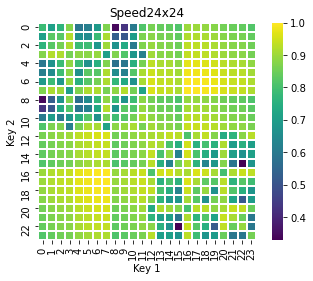

In [5]:
#speed_factor = 1
#if speed_factor > 0.0:

load_original_interkey_timings_table = False
if load_original_interkey_timings_table:

    interkey_table = "data/interkey-timings.xlsx"
    wb = xlrd.open_workbook(interkey_table) 
    interkey_sheet = wb.sheet_by_index(0)

    # Convert interkey stroke times table to array:
    Time32x32 = np.zeros((32,32))
    for i in range(1,33):
        for j in range(1,33):
            if interkey_sheet.cell_value(i,j):
                Time32x32[i-1,j-1] = interkey_sheet.cell_value(i,j)

    # Fill empty (symmetric) portion of the array:
    for i in range(1,33):
        for j in range(1,33):
            if interkey_sheet.cell_value(i,j):
                Time32x32[j-1,i-1] = interkey_sheet.cell_value(i,j)

    # Extract pairwise entries for the 24 vertical range keys:
    table_24_positions = [1,4,7,10, 2,5,8,11, 3,6,9,12,  19,22,25,28, 20,23,26,29, 21,24,27,30]
    Time24x24 = np.zeros((24, 24))
    u = 0
    for i in table_24_positions:
        u += 1
        v = 0
        for j in table_24_positions:
            v += 1
            Time24x24[u-1,v-1] = Time32x32[i-1,j-1]

    # Left/right symmetric version of the Time24x24 matrix
    # (The original version was constructed with data from right-handed people.)
    TimeSymmetric24x24 = np.ones((24,24))
    for i in range(24):
        for j in range(24):
            avgvalue = (Time24x24[i,j] + Time24x24[j,i]) / 2 
            TimeSymmetric24x24[i,j] = avgvalue
            TimeSymmetric24x24[j,i] = avgvalue

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = 1.0 - strength_factor  # np.min(TimeSymmetric24x24) / np.max(TimeSymmetric24x24)
    newMax = 1.0
    TimeSymmetric24x24 = newMin + (TimeSymmetric24x24 - np.min(TimeSymmetric24x24)) * (newMax - newMin) / (np.max(TimeSymmetric24x24) - np.min(TimeSymmetric24x24))

    # Convert relative interkey stroke times to relative speeds by subtracting from 1:
    Speed24x24 = 1 - TimeSymmetric24x24 + np.min(TimeSymmetric24x24)

    # Print:
    print(repr(Speed24x24))

else:
    Speed24x24 = np.array([[0.78729282, 0.70718232, 0.76519337, 0.87569061, 0.59392265,
    0.6160221 , 0.69060773, 0.87016575, 0.34254144, 0.43093923,
    0.60220994, 0.81491713, 0.86187845, 0.84254144, 0.83701657,
    0.81491713, 0.89779006, 0.89779006, 0.89226519, 0.87845304,
    0.85635359, 0.84530387, 0.83977901, 0.81767956],
   [0.70718232, 0.82872928, 0.82596685, 0.92265193, 0.66850829,
    0.6519337 , 0.78729282, 0.91436464, 0.53038674, 0.51104972,
    0.6961326 , 0.86740331, 0.88121547, 0.86187845, 0.85911602,
    0.83701657, 0.9198895 , 0.9198895 , 0.91436464, 0.90055249,
    0.87845304, 0.86740331, 0.86187845, 0.83977901],
   [0.76519337, 0.82596685, 0.85911602, 0.91712707, 0.78729282,
    0.79281768, 0.6878453 , 0.90055249, 0.67403315, 0.73756906,
    0.60220994, 0.87016575, 0.89502762, 0.87569061, 0.87292818,
    0.85082873, 0.93370166, 0.93370166, 0.9281768 , 0.91436464,
    0.89226519, 0.87845304, 0.87569061, 0.85359116],
   [0.87569061, 0.92265193, 0.91712707, 0.86187845, 0.88674033,
    0.8839779 , 0.89502762, 0.70441989, 0.87292818, 0.81767956,
    0.68232044, 0.61878453, 0.90331492, 0.88121547, 0.87845304,
    0.85635359, 0.93922652, 0.93922652, 0.93370166, 0.9198895 ,
    0.89779006, 0.88674033, 0.88121547, 0.85911602],
   [0.59392265, 0.66850829, 0.78729282, 0.88674033, 0.78729282,
    0.66574586, 0.75414365, 0.87016575, 0.5801105 , 0.59116022,
    0.75414365, 0.86187845, 0.93370166, 0.91436464, 0.91160221,
    0.88674033, 0.97237569, 0.97237569, 0.9640884 , 0.95027624,
    0.9281768 , 0.91712707, 0.91160221, 0.88950276],
   [0.6160221 , 0.6519337 , 0.79281768, 0.8839779 , 0.66574586,
    0.82872928, 0.82320442, 0.91712707, 0.6519337 , 0.62154696,
    0.82044199, 0.91436464, 0.94751381, 0.9281768 , 0.92541436,
    0.90331492, 0.98618785, 0.98618785, 0.98066298, 0.96685083,
    0.94475138, 0.93093923, 0.9281768 , 0.90607735],
   [0.69060773, 0.78729282, 0.6878453 , 0.89502762, 0.75414365,
    0.82320442, 0.85911602, 0.91712707, 0.77348066, 0.73480663,
    0.66850829, 0.91160221, 0.95856354, 0.93922652, 0.93646409,
    0.91436464, 0.99723757, 0.99723757, 0.99171271, 0.97790055,
    0.9558011 , 0.94198895, 0.93922652, 0.91712707],
   [0.87016575, 0.91436464, 0.90055249, 0.70441989, 0.87016575,
    0.91712707, 0.91712707, 0.86187845, 0.88674033, 0.92265193,
    0.85911602, 0.71823204, 0.96132597, 0.94198895, 0.93922652,
    0.91436464, 1.        , 1.        , 0.99171271, 0.98066298,
    0.9558011 , 0.94475138, 0.93922652, 0.91712707],
   [0.34254144, 0.53038674, 0.67403315, 0.87292818, 0.5801105 ,
    0.6519337 , 0.77348066, 0.88674033, 0.78729282, 0.67679558,
    0.79281768, 0.8839779 , 0.85635359, 0.83701657, 0.83425414,
    0.80939227, 0.89502762, 0.89502762, 0.88674033, 0.87569061,
    0.85082873, 0.83977901, 0.83425414, 0.8121547 ],
   [0.43093923, 0.51104972, 0.73756906, 0.81767956, 0.59116022,
    0.62154696, 0.73480663, 0.92265193, 0.67679558, 0.82872928,
    0.82044199, 0.89502762, 0.87016575, 0.85082873, 0.8480663 ,
    0.82596685, 0.90883978, 0.90883978, 0.90331492, 0.88950276,
    0.86740331, 0.85359116, 0.85082873, 0.82872928],
   [0.60220994, 0.6961326 , 0.60220994, 0.68232044, 0.75414365,
    0.82044199, 0.66850829, 0.85911602, 0.79281768, 0.82044199,
    0.85911602, 0.91436464, 0.88950276, 0.87016575, 0.86740331,
    0.84254144, 0.9281768 , 0.9281768 , 0.9198895 , 0.90607735,
    0.8839779 , 0.87292818, 0.86740331, 0.84530387],
   [0.81491713, 0.86740331, 0.87016575, 0.61878453, 0.86187845,
    0.91436464, 0.91160221, 0.71823204, 0.8839779 , 0.89502762,
    0.91436464, 0.86187845, 0.90607735, 0.88674033, 0.8839779 ,
    0.86187845, 0.94475138, 0.94475138, 0.93922652, 0.92541436,
    0.90331492, 0.88950276, 0.88674033, 0.86464088],
   [0.86187845, 0.88121547, 0.89502762, 0.90331492, 0.93370166,
    0.94751381, 0.95856354, 0.96132597, 0.85635359, 0.87016575,
    0.88950276, 0.90607735, 0.91160221, 0.92265193, 0.93922652,
    0.9281768 , 0.80939227, 0.91160221, 0.93646409, 0.87569061,
    0.74033149, 0.76519337, 0.88121547, 0.9281768 ],
   [0.84254144, 0.86187845, 0.87569061, 0.88121547, 0.91436464,
    0.9281768 , 0.93922652, 0.94198895, 0.83701657, 0.85082873,
    0.87016575, 0.88674033, 0.92265193, 0.91160221, 0.80662983,
    0.75138122, 0.95027624, 0.75690608, 0.80110497, 0.75966851,
    0.91712707, 0.70165746, 0.75414365, 0.70441989],
   [0.83701657, 0.85911602, 0.87292818, 0.87845304, 0.91160221,
    0.92541436, 0.93646409, 0.93922652, 0.83425414, 0.8480663 ,
    0.86740331, 0.8839779 , 0.93922652, 0.80662983, 0.89502762,
    0.62983425, 0.95303867, 0.80939227, 0.74861878, 0.69060773,
    0.90055249, 0.70441989, 0.66850829, 0.70718232],
   [0.81491713, 0.83701657, 0.85082873, 0.85635359, 0.88674033,
    0.90331492, 0.91436464, 0.91436464, 0.80939227, 0.82596685,
    0.84254144, 0.86187845, 0.9281768 , 0.75138122, 0.62983425,
    0.85911602, 0.92265193, 0.75966851, 0.63535912, 0.68508287,
    0.87569061, 0.58839779, 0.32872928, 0.67679558],
   [0.89779006, 0.9198895 , 0.93370166, 0.93922652, 0.97237569,
    0.98618785, 0.99723757, 1.        , 0.89502762, 0.90883978,
    0.9281768 , 0.94475138, 0.80939227, 0.95027624, 0.95303867,
    0.92265193, 0.91160221, 0.96132597, 0.94751381, 0.90883978,
    0.79834254, 0.91712707, 0.94475138, 0.93370166],
   [0.89779006, 0.9198895 , 0.93370166, 0.93922652, 0.97237569,
    0.98618785, 0.99723757, 1.        , 0.89502762, 0.90883978,
    0.9281768 , 0.94475138, 0.91160221, 0.75690608, 0.80939227,
    0.75966851, 0.96132597, 0.91160221, 0.83425414, 0.82320442,
    0.9281768 , 0.76519337, 0.82320442, 0.79281768],
   [0.89226519, 0.91436464, 0.9281768 , 0.93370166, 0.9640884 ,
    0.98066298, 0.99171271, 0.99171271, 0.88674033, 0.90331492,
    0.9198895 , 0.93922652, 0.93646409, 0.80110497, 0.74861878,
    0.63535912, 0.94751381, 0.83425414, 0.89502762, 0.66574586,
    0.9281768 , 0.81767956, 0.75414365, 0.67955801],
   [0.87845304, 0.90055249, 0.91436464, 0.9198895 , 0.95027624,
    0.96685083, 0.97790055, 0.98066298, 0.87569061, 0.88950276,
    0.90607735, 0.92541436, 0.87569061, 0.75966851, 0.69060773,
    0.68508287, 0.90883978, 0.82320442, 0.66574586, 0.85911602,
    0.88674033, 0.72099448, 0.51933702, 0.69337017],
   [0.85635359, 0.87845304, 0.89226519, 0.89779006, 0.9281768 ,
    0.94475138, 0.9558011 , 0.9558011 , 0.85082873, 0.86740331,
    0.8839779 , 0.90331492, 0.74033149, 0.91712707, 0.90055249,
    0.87569061, 0.79834254, 0.9281768 , 0.9281768 , 0.88674033,
    0.91160221, 0.94198895, 0.93646409, 0.84530387],
   [0.84530387, 0.86740331, 0.87845304, 0.88674033, 0.91712707,
    0.93093923, 0.94198895, 0.94475138, 0.83977901, 0.85359116,
    0.87292818, 0.88950276, 0.76519337, 0.70165746, 0.70441989,
    0.58839779, 0.91712707, 0.76519337, 0.81767956, 0.72099448,
    0.94198895, 0.91160221, 0.84530387, 0.59668508],
   [0.83977901, 0.86187845, 0.87569061, 0.88121547, 0.91160221,
    0.9281768 , 0.93922652, 0.93922652, 0.83425414, 0.85082873,
    0.86740331, 0.88674033, 0.88121547, 0.75414365, 0.66850829,
    0.32872928, 0.94475138, 0.82320442, 0.75414365, 0.51933702,
    0.93646409, 0.84530387, 0.89502762, 0.59668508],
   [0.81767956, 0.83977901, 0.85359116, 0.85911602, 0.88950276,
    0.90607735, 0.91712707, 0.91712707, 0.8121547 , 0.82872928,
    0.84530387, 0.86464088, 0.9281768 , 0.70441989, 0.70718232,
    0.67679558, 0.93370166, 0.79281768, 0.67955801, 0.69337017,
    0.84530387, 0.59668508, 0.59668508, 0.85911602]])

    # Print:
    print_matrix_info(matrix_data=Speed24x24, matrix_label="Speed24x24", nkeys=24, nlines=10)
    heatmap(data=Speed24x24, title="Speed24x24", xlabel="Key 1", ylabel="Key 2")

    # Save:
    file = open("Speed24x24.txt", "w+")
    file.write(str(Speed24x24))
    file.close()

In [6]:
# Histogram
if speed_factor > 0.0:
    sns_plot = sns.distplot(Speed24x24)
    sns_plot.figure.savefig("{0}_histogram.png".format("Speed24x24"))

Output:

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Speed24x24 min = 0.1, max = 1.0
    Speed24x24 key number pairs with minimum values:
        16 -> 23        (0.1)
        23 -> 16        (0.1)
        1 -> 9        (0.1185185185185185)
        9 -> 1        (0.1185185185185185)
        10 -> 1        (0.23703703703703707)
        1 -> 10        (0.23703703703703707)
        2 -> 10        (0.34444444444444444)
        10 -> 2        (0.34444444444444444)
        20 -> 23        (0.3555555555555556)
        23 -> 20        (0.3555555555555556)
    Speed24x24 key number pairs with maximum values:
        8 -> 17        (1.0)
        18 -> 8        (1.0)
        17 -> 8        (1.0)
        8 -> 18        (1.0)
        18 -> 7        (0.9962962962962962)
        7 -> 18        (0.9962962962962962)
        17 -> 7        (0.9962962962962962)
        7 -> 17        (0.9962962962962962)
        8 -> 19        (0.9888888888888888)
        7 -> 19        (0.9888888888888888)

## Strength matrix  <a name="strength">

### 24x24 relative finger position STRENGTH matrix

Finger strengths are based on peak keyboard reaction forces (in newtons) from Table 4 of <br>
"Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work" <br>
BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996,38(4),654-664:
   
    middle     2.36
    index      2.26
    ring       2.02
    little     1.84
    
    2.36/1.84 = 1.28
    2.36/2.02 = 1.17

For reference, Table 1 of "Ergonomic keyboard layout designed for the Filipino language", 2016 (doi: 10.1007/978-3-319-41694-6_41) presents "average finger strength of Filipinos [n=30, ages 16-36] measured in pounds":
   
                L       R
    little     3.77   4.27
    ring       4.54   5.08
    middle     5.65   6.37
    index      6.09   6.57
    
    6.57/4.27 = 1.54
    6.09/3.77 = 1.62
    6.37/5.08 = 1.25
    5.65/4.54 = 1.24
    
We won't use these results as I don't feel they represent relative strength relevant for typing: "Respondents were asked to sit in upright position, with their wrists resting on a flat surface. A pinch gauge was placed within each finger's reach. The respondents were asked to exert maximum pressure on the device."
    
The following does not take into account order of key pairs (see Flow matrix).


In [7]:
# Normalize by the highest peak force (middle finger):
middle_force = 2.36
index_force = 2.26
ring_force = 2.02
little_force = 1.84
middle_norm = 1.0
index_norm = index_force / middle_force
ring_norm = ring_force / middle_force
little_norm = little_force / middle_force

# Relative left/right hand strength (assume equal):
lf = 1.0
rf = 1.0

Strength24x24 min = 0.99, max = 1.0
Strength24x24 key number pairs with minimum values:
        1 -> 1        (0.99)
        5 -> 9        (0.99)
        5 -> 16        (0.99)
        5 -> 20        (0.99)
        5 -> 24        (0.99)
        9 -> 1        (0.99)
        9 -> 5        (0.99)
        9 -> 9        (0.99)
        9 -> 16        (0.99)
        9 -> 20        (0.99)
Strength24x24 key number pairs with maximum values:
        18 -> 11        (1.0)
        22 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        18 -> 14        (1.0)
        3 -> 18        (1.0)
        18 -> 18        (1.0)
        22 -> 22        (1.0)
        18 -> 22        (1.0)


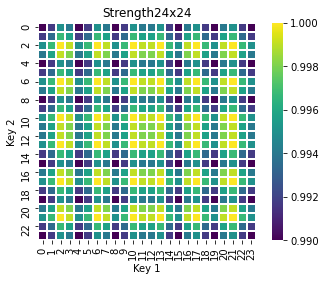

In [8]:
strengths24 = np.array((lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm))

# Create a finger-pair position strength matrix by adding pairs of strength values:
Strength24x24 = np.zeros((24, 24))
for i in range(24):
    Strength24x24[i,:] = strengths24
Strength24x24 = (Strength24x24 + Strength24x24.transpose())

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = 1.0 - strength_factor  # np.min(Strength24x24) / np.max(Strength24x24)
newMax = 1.0
Strength24x24 = newMin + (Strength24x24 - np.min(Strength24x24)) * (newMax - newMin) / (np.max(Strength24x24) - np.min(Strength24x24))

# Print:
print_matrix_info(matrix_data=Strength24x24, matrix_label="Strength24x24", nkeys=24, nlines=10)
heatmap(data=Strength24x24, title="Strength24x24", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("Strength24x24.txt", "w+")
file.write(str(Strength24x24))
file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


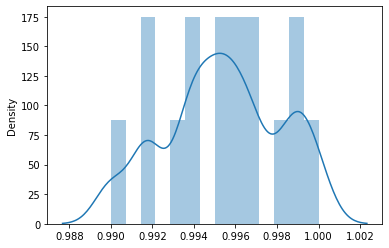

In [9]:
# Histogram
sns_plot = sns.distplot(Strength24x24)
sns_plot.figure.savefig("{0}_histogram.png".format("Strength24x24"))

Strength32x32 min = 0.99, max = 1.0
Strength32x32 key number pairs with minimum values:
        1 -> 1        (0.99)
        20 -> 5        (0.99)
        20 -> 1        (0.99)
        32 -> 31        (0.99)
        16 -> 31        (0.99)
        16 -> 24        (0.99)
        16 -> 20        (0.99)
        16 -> 16        (0.99)
        16 -> 9        (0.99)
        16 -> 5        (0.99)
Strength32x32 key number pairs with maximum values:
        22 -> 3        (1.0)
        18 -> 22        (1.0)
        3 -> 22        (1.0)
        22 -> 7        (1.0)
        11 -> 11        (1.0)
        7 -> 18        (1.0)
        11 -> 14        (1.0)
        7 -> 22        (1.0)
        11 -> 18        (1.0)
        14 -> 18        (1.0)


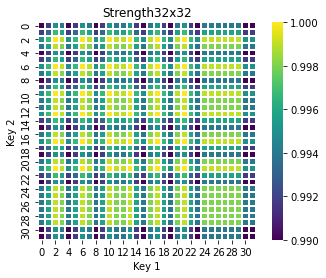

In [10]:
penalty = 1.0  # Penalty for lateral (index, little) finger placement (1 = no penalty)

strengths32 = np.array((lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        lf * index_norm * penalty, lf * index_norm * penalty, lf * index_norm * penalty,
                        rf * index_norm * penalty, rf * index_norm * penalty, rf * index_norm * penalty,
                        rf * little_norm * penalty, rf * little_norm * penalty))

# Create a finger-pair position strength matrix by adding pairs of strength values:
Strength32x32 = np.zeros((32, 32))
for i in range(32):
    Strength32x32[i,:] = strengths32
Strength32x32 = (Strength32x32 + Strength32x32.transpose())

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = 1.0 - strength_factor  # np.min(Strength32x32) / np.max(Strength32x32)
newMax = 1.0
Strength32x32 = newMin + (Strength32x32 - np.min(Strength32x32)) * (newMax - newMin) / (np.max(Strength32x32) - np.min(Strength32x32))

# Print:
print_matrix_info(matrix_data=Strength32x32, matrix_label="Strength32x32", nkeys=32, nlines=10)
heatmap(data=Strength32x32, title="Strength32x32", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("Strength32x32.txt", "w+")
file.write(str(Strength32x32))
file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


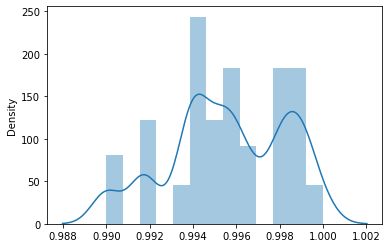

In [11]:
# Histogram
sns_plot = sns.distplot(Strength32x32)
sns_plot.figure.savefig("{0}_histogram.png".format("Strength32x32"))

### Strength output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

Strength24x24 min = 0.9, max = 1.0
Strength24x24 key number pairs with minimum values:

        1 -> 1        (0.9)
        5 -> 9        (0.9)
        5 -> 16        (0.9)
        5 -> 20        (0.9)
        5 -> 24        (0.9)
        9 -> 1        (0.9)
        9 -> 5        (0.9)
        9 -> 9        (0.9)
        9 -> 16        (0.9)
        9 -> 20        (0.9)

Strength24x24 key number pairs with maximum values:

        18 -> 11        (1.0)
        22 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        18 -> 14        (1.0)
        3 -> 18        (1.0)
        18 -> 18        (1.0)
        22 -> 22        (1.0)
        18 -> 22        (1.0)

## Flow matrix  <a name="flow">

The Flow24x24 matrix takes into account ease of transition between ordered pairs of keys

#### Dvorak et al. (1936) defined eleven criteria for the design and evaluation of keyboard layouts:
1.  Deviation from the balance of hand and finger loads should be as low as possible.
2.  Percentage of tapping with the same fingers should be as low as possible.
3.  Percentage of tapping that includes top row should be as low as possible.
4.  Percentage of tapping that includes bottom row should be as low as possible.
5.  Percentage of tapping in the home row should be as high as possible.
6.  Percentage of tapping by alternating hands should be as high as possible.
7.  Percentage of hurdles with the same finger should be as low as possible.
8.  Percentage of hurdles with adjacent fingers should be as low as possible.
9.  Percentage of hurdles with remote fingers should be as low as possible.
10. Percentage of reach with the same finger should be as low as possible.
11. Percentage of reach with adjacent fingers should be as low as possible.

#### Synopsis of above criteria for pairwise key presses when touch typing:
(A) 1,6.    Alternate between hands and balance finger loads. <br>
(B) 2,7,10. Avoid using the same finger. <br>
(C) 3,4,5.  Avoid the upper and lower rows. <br>
(D) 7,8,9.  Avoid skipping over the home row ("hurdling"). <br>
(E) 10,11.  Avoid tapping adjacent rows ("reaching") with (same or) adjacent fingers.

#### The approach here advocates the following related criteria (see above for complete list):

7.  Promote alternating between hands over uncomfortable transitions with the same hand.
8.  Promote little-to-index-finger roll-ins over index-to-little-finger roll_outs.
9.  Avoid stretching shorter fingers up and longer fingers down.
10. Avoid using the same finger.
11. Avoid the upper and lower rows.
12. Avoid skipping over the home row.

We will attempt to account for (A-E) by the rules to generate the Flow24x24 matrix. 
Additionally, left/right balance for (A) will be accounted for in part by
splitting up the most common keeps to left and right sides of the keyboard, 
and rather than try to balance finger loads equally,
we will weight finger use according to their relative strength.

### Factors to penalize difficult key transitions

Examples:

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    key 10 to key 1: same_hand * roll_out * not_home_row * skip_home_row * side_top * side_up_1away_down * center_bottom = 0.9^6 = 0.531441
    key  9 to key 1: same_hand * same_finger * not_home_row * skip_home_row * side_top =  0.8 * 0.9^3 = 0.5832

    key 2 to key 7: same_hand * not_home_row * ring_up_middle_down = 0.9^2 = 0.81
    key 2 to key 6: same_hand * same_finger * not_home_row = 0.8 * 0.9 = 0.72

    key 11 to key 2: same_hand * roll_out * not_home_row * skip_home_row * center_bottom * ring_up_middle_down = 0.9^5 = 0.59049
    key 10 to key 2: same_hand * same_finger * not_home_row * skip_home_row * center_bottom = 0.8 * 0.9^3 = 0.5832

    key 12 to key 2: same_hand * roll_out * not_home_row * skip_home_row = 0.9^4 = 0.6561
    key 10 to key 2: same_hand * same_finger * not_home_row * skip_home_row * center_bottom = 0.8 * 0.9^3 = 0.5832

    key 12 to key 1: same_hand * roll_out * not_home_row * skip_home_row * side_top = 0.9^5 = 0.59049
    key  9 to key 1: same_hand * same_finger * not_home_row * skip_home_row * side_top = 0.8 * 0.9^3 = 0.5832

In [12]:
# Penalizing factors for 24 keys  (1 = no penalty; set to less than 1 to penalize):
same_hand = 1.0  # Taken care of by splitting up the most frequent letters across left/right sides above
same_finger = 0.8  # use same finger twice for a non-repeating letter (worse than 2 fingers)
roll_out = 0.9  # roll out from index to little finger
not_home_row = 0.9  # at least one key not on home row
skip_home_row = 0.9  # one key on top row, the other on bottom row
side_top = 0.9  # either index or little finger on top row
side_up_1away_down = 0.9  # index above middle, or little above ring 
side_up_2away_down = 0.95  # index above ring, or little above middle
side_up_3away_down = 1.0  # index above little, or little above index -- assumed to be negligible
center_bottom = 0.9  # either middle or ring finger on bottom row
ring_up_middle_down = 0.9  # ring above middle

# Penalizing factor for 32 keys:
lateral = 0.9 # lateral movement of (index or little) finger outside of 8 vertical columns

#         Left:             Right:
#     1  2  3  4 25   28 13 14 15 16 31 
#     5  6  7  8 26   29 17 18 19 20 32
#     9 10 11 12 27   30 21 22 23 24

#### 24 keys:

Flow24x24 min = 0.5314410000000002, max = 1.0
Flow24x24 key number pairs with minimum values:
        23 -> 16        (0.5314410000000002)
        10 -> 1        (0.5314410000000002)
        4 -> 11        (0.5314410000000002)
        13 -> 22        (0.5314410000000002)
        4 -> 10        (0.5609655000000001)
        22 -> 16        (0.5609655000000001)
        11 -> 1        (0.5609655000000001)
        13 -> 23        (0.5609655000000001)
        3 -> 11        (0.5832000000000002)
        24 -> 16        (0.5832000000000002)
Flow24x24 key number pairs with maximum values:
        5 -> 18        (1.0)
        20 -> 18        (1.0)
        5 -> 17        (1.0)
        5 -> 19        (1.0)
        5 -> 20        (1.0)
        19 -> 17        (1.0)
        19 -> 18        (1.0)
        19 -> 19        (1.0)
        6 -> 6        (1.0)
        6 -> 7        (1.0)


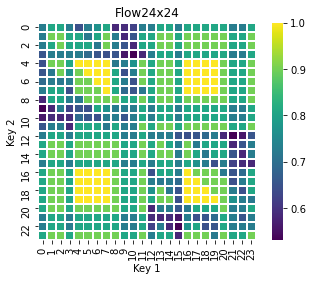

In [13]:
def create_24x24_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down):

    all_24_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((24, 24))

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
        for i in range(0,12):
            for j in range(0,12):
                T[i,j] *= same_hand
        for i in range(12,24):
            for j in range(12,24):
                T[i,j] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger roll_outs.
    if roll_out < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= roll_out

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= roll_out

        # adjacent-row roll-outs:
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], [24,19],[24,18],[24,17],[23,18],[23,17],[22,17]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= roll_out

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[2,11],[2,12],[3,12], [9,2],[9,3],[9,4],[10,3],[10,4],[11,4],
                              [16,23],[16,22],[16,21],[15,22],[15,21],[14,21], [24,15],[24,14],[24,13],[23,14],[23,13],[22,13]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= roll_out

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    if side_top:
        for x in all_24_keys:
            for y in [1,4,13,16]:
                T[x-1, y-1] *= side_top
                T[y-1, x-1] *= side_top
    if center_bottom:
        for x in all_24_keys:
            for y in [10,11,22,23]:
                T[x-1, y-1] *= center_bottom
                T[y-1, x-1] *= center_bottom

    if side_up_1away_down < 1.0 or side_up_2away_down < 1.0 or side_up_3away_down < 1.0 or ring_up_middle_down < 1.0:
        side_up_1away_downs = [[1,6],  [1,10], [5,10],   [7,4],  [11,4], [11,8], 
                               [16,19],[16,23],[20,23],  [18,13],[22,13],[22,17]]
        side_up_2away_downs = [[1,7],  [1,11], [5,11],   [6,4],  [10,4], [10,8], 
                               [16,18],[16,22],[20,22],  [19,13],[23,13],[23,17]]
        side_up_3away_downs = [[1,8],  [1,12], [5,12],   [5,4],  [9,4],  [9,8], 
                               [16,17],[16,21],[20,21],  [20,13],[24,13],[24,17]]
        ring_up_middle_downs = [[2,7],[6,11],[2,11], [15,18],[19,22],[15,22]]
        if side_up_1away_down < 1.0:
            for x in side_up_1away_downs:
                T[x[0]-1, x[1]-1] *= side_up_1away_down
                T[x[1]-1, x[0]-1] *= side_up_1away_down
        if side_up_2away_down < 1.0:
            for x in side_up_2away_downs:
                T[x[0]-1, x[1]-1] *= side_up_2away_down
                T[x[1]-1, x[0]-1] *= side_up_2away_down
        if side_up_3away_down < 1.0:
            for x in side_up_3away_downs:
                T[x[0]-1, x[1]-1] *= side_up_3away_down
                T[x[1]-1, x[0]-1] *= side_up_3away_down
        if ring_up_middle_down < 1.0:
            for x in ring_up_middle_downs:
                T[x[0]-1, x[1]-1] *= ring_up_middle_down
                T[x[1]-1, x[0]-1] *= ring_up_middle_down

    # 10. Avoid using the same finger.
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4, 9,10,11,12, 13,14,15,16, 21,22,23,24]
        home_row_keys = [5,6,7,8, 17,18,19,20]
        for x in not_home_row_keys:
            for y in not_home_row_keys:
                T[x-1, y-1] *= not_home_row
        for x in not_home_row_keys:
            for y in home_row_keys:
                T[x-1, y-1] *= not_home_row
                T[y-1, x-1] *= not_home_row

    # 12. Avoid skipping over the home row.
    if skip_home_row < 1.0:
        skip_home_rows_left = [[1,2,3,4], [9,10,11,12]] 
        skip_home_rows_right = [[13,14,15,16], [21,22,23,24]] 
        for x in skip_home_rows_left[0]:
            for y in skip_home_rows_left[1]:
                T[x-1, y-1] *= skip_home_row
                T[y-1, x-1] *= skip_home_row
        for x in skip_home_rows_right[0]:
            for y in skip_home_rows_right[1]:
                T[x-1, y-1] *= skip_home_row
                T[y-1, x-1] *= skip_home_row

    Flow24x24 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow24x24) / np.max(Flow24x24)
    newMax = 1.0
    Flow24x24 = newMin + (Flow24x24 - np.min(Flow24x24)) * (newMax - newMin) / (np.max(Flow24x24) - np.min(Flow24x24))

    return Flow24x24

Flow24x24 = create_24x24_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down)

# Print:
print_matrix_info(matrix_data=Flow24x24, matrix_label="Flow24x24", nkeys=24, nlines=10)
heatmap(data=Flow24x24, title="Flow24x24", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("Flow24x24.txt", "w+")
file.write(str(Flow24x24))
file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


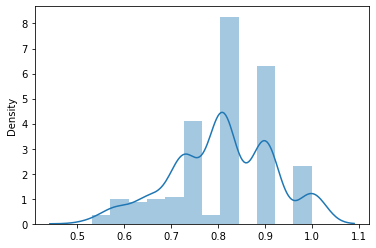

In [14]:
# Histogram
sns_plot = sns.distplot(Flow24x24)
sns_plot.figure.savefig("{0}_histogram.png".format("Flow24x24"))

#### 32 keys:

         Left:             Right:
     1  2  3  4 25   28 13 14 15 16 31 
     5  6  7  8 26   29 17 18 19 20 32
     9 10 11 12 27   30 21 22 23 24


Flow32x32 min = 0.42515280000000016, max = 1.0
Flow32x32 key number pairs with minimum values:
        24 -> 31        (0.42515280000000016)
        25 -> 12        (0.42515280000000016)
        28 -> 21        (0.42515280000000016)
        21 -> 28        (0.47239200000000003)
        30 -> 28        (0.47239200000000003)
        27 -> 4        (0.47239200000000003)
        30 -> 13        (0.47239200000000003)
        31 -> 24        (0.47239200000000003)
        28 -> 30        (0.47239200000000003)
        27 -> 25        (0.47239200000000003)
Flow32x32 key number pairs with maximum values:
        18 -> 18        (1.0)
        5 -> 5        (1.0)
        7 -> 20        (1.0)
        17 -> 17        (1.0)
        20 -> 20        (1.0)
        20 -> 19        (1.0)
        20 -> 18        (1.0)
        20 -> 17        (1.0)
        18 -> 5        (1.0)
        18 -> 6        (1.0)


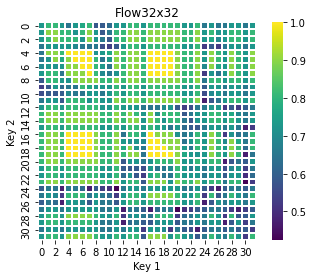

In [15]:
def create_32x32_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down):

    all_32_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24, 
                   25,26,27, 28,29,30, 31,32]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((32, 32))

    # Penalize (index, little) finger lateral movements:
    if lateral < 1.0:
        for x in all_32_keys:
            for y in [25,26,27,28,29,30,31,32]:
                T[x-1, y-1] *= lateral
                T[y-1, x-1] *= lateral    

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
        for i in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
            for j in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
                T[i-1,j-1] *= same_hand
        for i in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
            for j in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
                T[i-1,j-1] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger roll_outs.
    if roll_out < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [4,25],[8,26],[12,27],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21],
                    [13,28],[17,29],[21,30],[31,16],[32,20]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= roll_out

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [1,25],[2,25],[3,25],
                              [5,26],[6,26],[7,26],
                              [9,27],[10,27],[11,27],
                              [9,30],[10,30],[11,30],[12,30],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21],
                              [16,28],[15,28],[14,28],
                              [20,29],[19,29],[18,29],
                              [24,30],[23,30],[22,30],
                              [31,15],[31,14],[31,13],[31,28],
                              [32,19],[32,18],[32,17],[32,29]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= roll_out

        # adjacent-row roll-outs:
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [5,25],[6,25],[7,25],[8,25],[5,27],[6,27],[7,27],[8,27],
                             [1,26],[2,26],[3,26],[4,26],[9,26],[10,26],[11,26],[12,26],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], [24,19],[24,18],[24,17],[23,18],[23,17],[22,17],
                             [16,29],[15,29],[14,29],[13,29],[24,29],[23,29],[22,29],[21,29],
                             [20,28],[19,28],[18,28],[17,28],[20,30],[19,30],[18,30],[17,30],
                             [31,20],[31,19],[31,18],[31,17],[31,29],[32,16],[32,15],[32,14],[32,13],[32,28],
                             [32,24],[32,23],[32,22],[32,21],[32,30]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= roll_out

    #         Left:             Right:
    #     1  2  3  4 25   28 13 14 15 16 31 
    #     5  6  7  8 26   29 17 18 19 20 32
    #     9 10 11 12 27   30 21 22 23 24

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[1,27],[2,11],[2,12],[2,27],[3,12],[3,27],[4,27], 
                              [9,2],[9,3],[9,4],[9,25],[10,3],[10,4],[10,25],[11,4],[11,25],[12,25],
                              [16,23],[16,22],[16,21],[16,30],[15,22],[15,21],[15,30],[14,21],[14,30],[13,30],
                              [24,15],[24,14],[24,13],[24,28],[23,14],[23,13],[23,28],[22,13],[22,28],[21,28],
                              [31,24],[31,23],[31,22],[31,21],[31,30]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= roll_out

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    if side_top:
        for x in all_32_keys:
            for y in [1,4,25, 28,13,16,31]:
                T[x-1, y-1] *= side_top
                T[y-1, x-1] *= side_top

    if center_bottom:
        for x in all_32_keys:
            for y in [10,11,22,23]:
                T[x-1, y-1] *= center_bottom
                T[y-1, x-1] *= center_bottom

    if side_up_1away_down < 1.0 or side_up_2away_down < 1.0 or side_up_3away_down < 1.0 or ring_up_middle_down < 1.0:
        side_up_1away_downs = [[1,6],  [1,10], [5,10],   [7,4],  [11,4], [11,8],
                               [8,25],[12,25],[12,26],   [17,28],[21,28],[21,29], 
                               [20,31],[24,31],[24,32],
                               [16,19],[16,23],[20,23],  [18,13],[22,13],[22,17]]
        side_up_2away_downs = [[1,7],  [1,11], [5,11],   [6,4],  [10,4], [10,8], 
                               [7,25], [11,25], [11,26], [3,26], [3,27], [7,27],
                               [16,18],[16,22],[20,22],  [19,13],[23,13],[23,17],
                               [14,29],[14,30],[18,30],  [22,29],[22,28],[18,28],
                               [31,19],[31,23],[32,23]]
        side_up_3away_downs = [[1,8],  [1,12], [5,12],   [5,4],  [9,4],  [9,8],
                               [2,26], [2,27], [6,27],   [6,25], [10,25],[10,26],
                               [16,17],[16,21],[20,21],  [20,13],[24,13],[24,17],
                               [15,29],[15,30],[19,30],  [19,28],[23,28],[23,29],
                               [31,18],[31,22],[32,22],  [32,14]]
        ring_up_middle_downs = [[2,7],[6,11],[2,11], [15,18],[19,22],[15,22]]
        if side_up_1away_down < 1.0:
            for x in side_up_1away_downs:
                T[x[0]-1, x[1]-1] *= side_up_1away_down
                T[x[1]-1, x[0]-1] *= side_up_1away_down
        if side_up_2away_down < 1.0:
            for x in side_up_2away_downs:
                T[x[0]-1, x[1]-1] *= side_up_2away_down
                T[x[1]-1, x[0]-1] *= side_up_2away_down
        if side_up_3away_down < 1.0:
            for x in side_up_3away_downs:
                T[x[0]-1, x[1]-1] *= side_up_3away_down
                T[x[1]-1, x[0]-1] *= side_up_3away_down
        if ring_up_middle_down < 1.0:
            for x in ring_up_middle_downs:
                T[x[0]-1, x[1]-1] *= ring_up_middle_down
                T[x[1]-1, x[0]-1] *= ring_up_middle_down

    # 10. Avoid using the same finger.
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [25,26],[26,27],[25,27],[28,29],[29,30],[28,30],[31,32],
                        [4,25],[4,26],[4,27],[8,25],[8,26],[8,27],[12,25],[12,26],[12,27],
                        [13,28],[13,29],[13,30],[17,28],[17,29],[17,30],[21,28],[21,29],[21,30],
                        [31,16],[31,20],[31,24],[32,16],[32,20],[32,24],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4,25, 9,10,11,12,27, 28,13,14,15,16,31, 30,21,22,23,24]
        home_row_keys = [5,6,7,8,26, 29,17,18,19,20,32]
        for x in not_home_row_keys:
            for y in not_home_row_keys:
                T[x-1, y-1] *= not_home_row
        for x in not_home_row_keys:
            for y in home_row_keys:
                T[x-1, y-1] *= not_home_row
                T[y-1, x-1] *= not_home_row

    # 12. Avoid skipping over the home row.
    if skip_home_row < 1.0:
        skip_home_rows_left = [[1,2,3,4,25], [9,10,11,12,27]] 
        skip_home_rows_right = [[28,13,14,15,16,31], [30,21,22,23,24]] 
        for x in skip_home_rows_left[0]:
            for y in skip_home_rows_left[1]:
                T[x-1, y-1] *= skip_home_row
                T[y-1, x-1] *= skip_home_row
        for x in skip_home_rows_right[0]:
            for y in skip_home_rows_right[1]:
                T[x-1, y-1] *= skip_home_row
                T[y-1, x-1] *= skip_home_row

    Flow32x32 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow32x32) / np.max(Flow32x32)
    newMax = 1.0
    Flow32x32 = newMin + (Flow32x32 - np.min(Flow32x32)) * (newMax - newMin) / (np.max(Flow32x32) - np.min(Flow32x32))

    return Flow32x32
    
Flow32x32 = create_32x32_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down)

# Print:
print_matrix_info(matrix_data=Flow32x32, matrix_label="Flow32x32", nkeys=32, nlines=10)
heatmap(data=Flow32x32, title="Flow32x32", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("Flow32x32.txt", "w+")
file.write(str(Flow32x32))
file.close()

#         Left:             Right:
#     1  2  3  4 25   28 13 14 15 16 31 
#     5  6  7  8 26   29 17 18 19 20 32
#     9 10 11 12 27   30 21 22 23 24

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


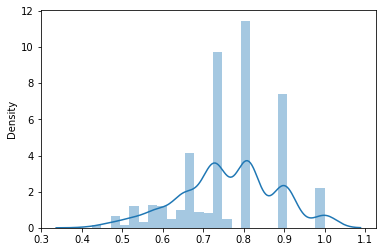

In [16]:
# Histogram
sns_plot = sns.distplot(Flow32x32)
sns_plot.figure.savefig("{0}_histogram.png".format("Flow32x32"))

### Flow output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Flow24x24 min = 0.5314410000000002, max = 1.0
    Flow24x24 key number pairs with minimum values:

        23 -> 16        (0.5314410000000002)
        10 -> 1        (0.5314410000000002)
        4 -> 11        (0.5314410000000002)
        13 -> 22        (0.5314410000000002)
        4 -> 10        (0.5609655000000001)
        22 -> 16        (0.5609655000000001)
        11 -> 1        (0.5609655000000001)
        13 -> 23        (0.5609655000000001)
        3 -> 11        (0.5832000000000002)
        24 -> 16        (0.5832000000000002)

    Flow24x24 key number pairs with maximum values:

        5 -> 18        (1.0)
        20 -> 18        (1.0)
        5 -> 17        (1.0)
        5 -> 19        (1.0)
        5 -> 20        (1.0)
        19 -> 17        (1.0)
        19 -> 18        (1.0)
        19 -> 19        (1.0)
        6 -> 6        (1.0)
        6 -> 7        (1.0)
        
    Flow32x32 min = 0.37324800000000014, max = 1.0
    Flow32x32 key number pairs with minimum values:

        30 -> 28        (0.37324800000000014)
        28 -> 30        (0.37324800000000014)
        27 -> 25        (0.37324800000000014)
        25 -> 27        (0.37324800000000014)
        28 -> 21        (0.3779136000000001)
        25 -> 12        (0.3779136000000001)
        24 -> 31        (0.3779136000000001)
        29 -> 28        (0.41472000000000014)
        28 -> 29        (0.41472000000000014)
        25 -> 26        (0.41472000000000014)

    Flow32x32 key number pairs with maximum values:

        8 -> 20        (1.0)
        6 -> 19        (1.0)
        6 -> 6        (1.0)
        18 -> 6        (1.0)
        18 -> 7        (1.0)
        18 -> 8        (1.0)
        7 -> 20        (1.0)
        6 -> 7        (1.0)
        8 -> 8        (1.0)
        6 -> 8        (1.0)

## Combine Speed, Strength, and Flow matrices  <a name="speedstrengthflow">

SpeedStrengthFlow24x24 min = 0.5270463917307694, max = 1.0
SpeedStrengthFlow24x24 key number pairs with minimum values:
        23 -> 16        (0.5270463917307694)
        10 -> 1        (0.5270463917307694)
        4 -> 11        (0.5309299990384617)
        13 -> 22        (0.5309299990384617)
        11 -> 1        (0.5581606725000001)
        22 -> 16        (0.5581606725000001)
        4 -> 10        (0.558592184423077)
        13 -> 23        (0.558592184423077)
        16 -> 24        (0.5773680000000001)
        24 -> 16        (0.5773680000000001)
SpeedStrengthFlow24x24 key number pairs with maximum values:
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        18 -> 18        (1.0)
        17 -> 7        (0.9990384615384615)
        18 -> 8        (0.9990384615384615)
        8 -> 18        (0.9990384615384615)
        18 -> 17        (0.9990384615384615)
        7 -> 8        (0.9990384615384615)
        7 -> 17        (0.9990384615384

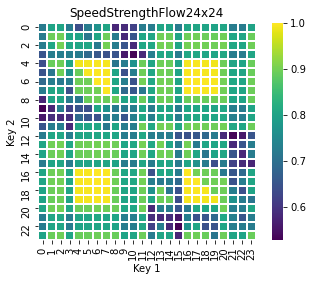

In [17]:
# 24 keys:
if speed_factor > 0.0:
    SpeedStrengthFlow24x24 = Speed24x24 * Strength24x24 * Flow24x24
else:
    SpeedStrengthFlow24x24 = Strength24x24 * Flow24x24

# Print:
print_matrix_info(matrix_data=SpeedStrengthFlow24x24, matrix_label="SpeedStrengthFlow24x24", nkeys=24, nlines=10)
heatmap(data=SpeedStrengthFlow24x24, title="SpeedStrengthFlow24x24", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("SpeedStrengthFlow24x24.txt", "w+")
file.write(str(SpeedStrengthFlow24x24))
file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


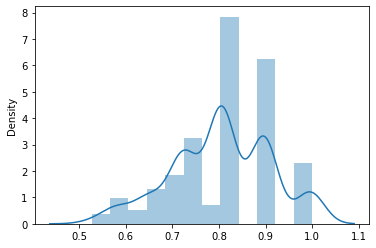

In [18]:
# Histogram
sns_plot = sns.distplot(SpeedStrengthFlow24x24)
sns_plot.figure.savefig("{0}_histogram.png".format("SpeedStrengthFlow24x24"))

SpeedStrengthFlow32x32 min = 0.42090127200000016, max = 1.0
SpeedStrengthFlow32x32 key number pairs with minimum values:
        24 -> 31        (0.42090127200000016)
        25 -> 12        (0.4243351984615386)
        28 -> 21        (0.4243351984615386)
        31 -> 24        (0.46766808000000004)
        16 -> 31        (0.46766808000000015)
        20 -> 31        (0.46766808000000015)
        25 -> 27        (0.47148355384615387)
        28 -> 30        (0.47148355384615387)
        27 -> 25        (0.47148355384615387)
        21 -> 28        (0.47148355384615387)
SpeedStrengthFlow32x32 key number pairs with maximum values:
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        7 -> 18        (1.0)
        18 -> 18        (1.0)
        7 -> 17        (0.9990384615384615)
        18 -> 17        (0.9990384615384615)
        8 -> 18        (0.9990384615384615)
        17 -> 7        (0.9990384615384615)
        18 -> 8        (0.9990384615384615)
        7 -> 8        (

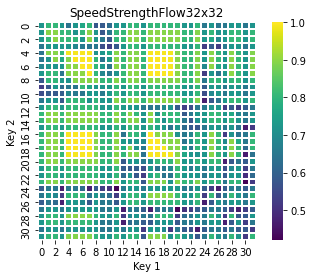

In [19]:
# 32 keys:
if speed_factor > 0.0:
    SpeedStrengthFlow32x32 = Speed32x32 * Strength32x32 * Flow32x32
else:
    SpeedStrengthFlow32x32 = Strength32x32 * Flow32x32

# Print:
print_matrix_info(matrix_data=SpeedStrengthFlow32x32, matrix_label="SpeedStrengthFlow32x32", nkeys=32, nlines=10)
heatmap(data=SpeedStrengthFlow32x32, title="SpeedStrengthFlow32x32", xlabel="Key 1", ylabel="Key 2")

# Save:
file = open("SpeedStrengthFlow32x32.txt", "w+")
file.write(str(SpeedStrengthFlow32x32))
file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


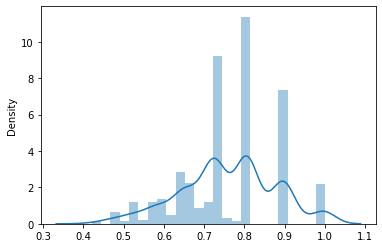

In [20]:
# Histogram
sns_plot = sns.distplot(SpeedStrengthFlow32x32)
sns_plot.figure.savefig("{0}_histogram.png".format("SpeedStrengthFlow32x32"))

### Combined output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    SpeedStrengthFlow24x24 min = 0.5270463917307694, max = 1.0
    SpeedStrengthFlow24x24 key number pairs with minimum values:
        23 -> 16        (0.5270463917307694)
        10 -> 1        (0.5270463917307694)
        4 -> 11        (0.5309299990384617)
        13 -> 22        (0.5309299990384617)
        11 -> 1        (0.5581606725000001)
        22 -> 16        (0.5581606725000001)
        4 -> 10        (0.558592184423077)
        13 -> 23        (0.558592184423077)
        16 -> 24        (0.5773680000000001)
        24 -> 16        (0.5773680000000001)

    SpeedStrengthFlow24x24 key number pairs with maximum values:
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        18 -> 18        (1.0)
        17 -> 7        (0.9990384615384615)
        18 -> 8        (0.9990384615384615)
        8 -> 18        (0.9990384615384615)
        18 -> 17        (0.9990384615384615)
        7 -> 8        (0.9990384615384615)
        7 -> 17        (0.9990384615384615)

         Left:             Right:
     1  2  3  4 25   28 13 14 15 16 31 
     5  6  7  8 26   29 17 18 19 20 32
     9 10 11 12 27   30 21 22 23 24

    SpeedStrengthFlow32x32 min = 0.3725302153846155, max = 1.0
    SpeedStrengthFlow32x32 key number pairs with minimum values:
        27 -> 25        (0.3725302153846155)
        25 -> 27        (0.3725302153846155)
        28 -> 30        (0.3725302153846155)
        30 -> 28        (0.3725302153846155)
        24 -> 31        (0.3741344640000001)
        25 -> 12        (0.3771868430769232)
        28 -> 21        (0.3771868430769232)
        32 -> 31        (0.4105728000000001)
        31 -> 32        (0.4105728000000001)
        28 -> 29        (0.4139224615384617)
    SpeedStrengthFlow32x32 key number pairs with maximum values:
        18 -> 7        (1.0)
        7 -> 7        (1.0)
        18 -> 18        (1.0)
        7 -> 18        (1.0)
        8 -> 18        (0.9990384615384615)
        18 -> 8        (0.9990384615384615)
        7 -> 17        (0.9990384615384615)
        18 -> 17        (0.9990384615384615)
        7 -> 8        (0.9990384615384615)
        17 -> 7        (0.9990384615384615)

## Step 1: Define the shape of the key layout to minimize lateral finger movements<a name="step1">

We will assign 24 letters to 8 columns of keys separated by two middle columns reserved for punctuation. These 8 columns require no lateral finger movements when touch typing, since there is one column per finger. The most comfortable keys include the left and right home rows (keys 5-8 and 17-20), the top-center keys (2,3 and 14,15) that allow the longer middle and ring fingers to uncurl upwards, as well as the bottom corner keys (9,12 and 21,24) that allow the shorter fingers to curl downwards. We will reserve the bottom left row (keys 9-12) for common command shortcut letters (Z,X,C,V), and will reserve the two hardest-to-reach keys lying outside the 24-key columns in the upper right to the two least frequent remaining letters, Q and J:

        Left:            Right:
     1  2  3  4       13 14 15 16  Q
     5  6  7  8       17 18 19 20  J
    [9 10 11 12]      21 22 23 24

## Step 2: Assign command shortcut letters to the bottom left row<a name="step2">

We begin by assigning the common command letters V,Z,X,C to the bottom left row. We place V and Z to the left of X and C, because V and Z are often repeated (to paste multiple times or to undo multiple mistakes) whereas C and X are not (the copy and cut buffers are overwritten), and should lie closer to the Ctrl/Cmd key for ease of access with one hand. V and C are assigned to the most comfortable of the four keys (as noted above) because they are more frequent letters in English than Z and X. 

    -  -  -  -        -  -  -  -
    -  -  -  -        -  -  -  -
    V  Z  X  C        -  -  -  -

## Step 3: Arrange the most frequent letters based on comfort and bigram frequencies  <a name="step3">

In prior experiments using the methods below, all vowels automatically clustered together, with the most frequent letters assigned to the strongest fingers (in order: middle, index, ring, little), and the letter Y consistently landed in the top left key for the highest-scoring layouts. Below, we will arrange vowels to the left side and the most frequent consonants to the right side to encourage balance and alternation across hands.
    
### Vowels
    
**E**, T, **A, O, I**, N, S, R, H, L, D, [C], **U**, M, F, P, G, W, **Y**, B, [V], K, [X], J, Q, [Z]

We will assign the four most frequent vowels (E,A,O,I) to the most comfortable keys in the left home and upper rows (keys 5-8 and 2-3), with the letter E, the most frequent in the English language, assigned to either of the strongest keys (7 and 8, the middle and index fingers on the left home row). The letter U may also take the less comfortable key 4. We will arrange the vowels such that any top-frequency bigram (more than 1 billion instances in Peter Norvig's analysis of Google data) reads from left to right (ex: TH, not HT) for ease of typing (roll-in from little to index finger vs. roll-out from index to little finger). These constraints lead to comfortable and efficient layouts:
    
    (1)  Y  O  U  -
         I  -  E  A    

    (2)  Y  -  U  - 
         I  O  E  A      

    (3)  Y  -  -  U 
         I  O  E  A      

    (4)  Y  -  O  U   
         I  -  E  A    

    (5)  Y  -  O  U   
         -  I  E  A    

    (6)  Y  I  O  U    
         -  -  E  A     

If we compare the relative comfort of typing 2-vowel letter sequences (bigrams) in the above layouts (see the list below of all 2-vowel bigrams with frequencies >1 billion from Peter Norvig's analysis of Google data), some bigrams are less comfortable to type either due to index-to-little finger roll-out vs. the more comfortable little-to-index finger roll-in ("x"), uncurling a smaller finger to reach the upper row ("#"), or repeated use of the same finger ("o"):
    
                      (1)  (2)  (3)  (4)  (5)  (6)          
     OU  24531132241     
     IO  23542263265
     EA  19403941063
     IE  10845731320                            #
     AI   8922759715   x    x    x    x    x    x        
     IA   8072199471
     EI   5169898489   x    x    x    x    x    x    
     UE   4158448570   o    o    x    x    x    x    
     AU   3356322923   x    x    o    o    o    o    
     UI   2852182384   x    x    x    x    x    x    
     OI   2474275212   x    x    x    x    x    x    
     EO   2044268477   x    x    x    o    o    o    
     OA   1620913259
     OE   1089254517   #              o    o    o
    
### Consonants

Next, to populate the home row on the right side, we examine all possible sequences of four letters from the seven most frequent consonants (T,N,S,R,H,L,D):

E, **T**, A, O, I, **N, S, R, H, L, D**, [C], U, M, F, P, G, W, Y, B, [V], K, [X], J, Q, [Z]

These seven consonants are included in the highest frequency bigrams listed below, with more than 1 billion instances in Peter Norvig's analysis:

**TH, ND, ST, NT, NS, TR, RS**, (RT), SH, LD, RD, LS, DS, LT, (TL), RL, HR, NL, (SL)
    
     TH 100272945963        
     ND  38129777631
     ST  29704461829   
     NT  29359771944
     NS  14350320288   
     TR  12006693396       
     RS  11180732354   
     RT  10198055461    
     TS   9516029773   
     SH   8888705287   
     LD   7122648226
     RD   5338083783
     LS   3990203351   
     HT   3670802795   
     DS   3560125353   
     LT   3486149365   
     TL   2775935006   
     RL   2432373251  
     DR   2409399231   
     HR   2379584978   
     NL   1798491132   
     SL   1575646777   

To maximize the number of bigrams we can comfortably type, we select 4-consonant sequences that consist of three consecutive highest frequency bigrams, such as NSTR = NS + ST + TR. We also restrict T and R to the strongest (middle or index) fingers, because T is the most frequent consonant, and the letter R needs to be preceded by other consonants to comfortably type frequent bigrams (TR,DR,HR,PR,FR,BR,GR, etc.) by rolling in from little-to-index finger.

    N  S  T  R
    N  L  T  R
    D  S  T  R    
    N  S  T  H
    N  L  T  H    
    L  S  T  H    
    D  S  T  H    
    N  L  S  T      
    N  D  S  T    
    L  D  S  T    
    
When reordered from right-to-left for ease of typing with the right hand, we have 10 consonant sequences:
    
    (0) RTSN
    (1) RTLN
    (2) RTSD
    (3) HTSN
    (4) HTLN
    (5) HTSL
    (6) HTSD
    (7) TSLN
    (8) TSDN
    (9) TSDL
    
The resulting 6 arrangements of five vowels on the left and 10 arrangements of four consonants on the right gives us 60 possible layouts, each with 10 unassigned keys:

          Left hand         Right hand
    10  YOU- I-EA VZXC    ---- RTSN ----
    11  YOU- I-EA VZXC    ---- RTLN ----
    12  YOU- I-EA VZXC    ---- RTSD ----
    13  YOU- I-EA VZXC    ---- HTSN ----
    14  YOU- I-EA VZXC    ---- HTLN ----
    15  YOU- I-EA VZXC    ---- HTSL ----
    16  YOU- I-EA VZXC    ---- HTSD ----
    17  YOU- I-EA VZXC    ---- TSLN ----
    18  YOU- I-EA VZXC    ---- TSDN ----
    19  YOU- I-EA VZXC    ---- TSDL ----

    20  Y-U- IOEA VZXC    ---- RTSN ----
    21  Y-U- IOEA VZXC    ---- RTLN ----
    22  Y-U- IOEA VZXC    ---- RTSD ----
    23  Y-U- IOEA VZXC    ---- HTSN ----
    24  Y-U- IOEA VZXC    ---- HTLN ----
    25  Y-U- IOEA VZXC    ---- HTSL ----
    26  Y-U- IOEA VZXC    ---- HTSD ----
    27  Y-U- IOEA VZXC    ---- TSLN ----
    28  Y-U- IOEA VZXC    ---- TSDN ----
    29  Y-U- IOEA VZXC    ---- TSDL ----

    30  Y--U IOEA VZXC    ---- RTSN ----
    31  Y--U IOEA VZXC    ---- RTLN ----
    32  Y--U IOEA VZXC    ---- RTSD ----
    33  Y--U IOEA VZXC    ---- HTSN ----
    34  Y--U IOEA VZXC    ---- HTLN ----
    35  Y--U IOEA VZXC    ---- HTSL ----
    36  Y--U IOEA VZXC    ---- HTSD ----
    37  Y--U IOEA VZXC    ---- TSLN ----
    38  Y--U IOEA VZXC    ---- TSDN ----
    39  Y--U IOEA VZXC    ---- TSDL ----
    
    40  Y-OU I-EA VZXC    ---- RTSN ----
    41  Y-OU I-EA VZXC    ---- RTLN ----
    42  Y-OU I-EA VZXC    ---- RTSD ----
    43  Y-OU I-EA VZXC    ---- HTSN ----
    44  Y-OU I-EA VZXC    ---- HTLN ----
    45  Y-OU I-EA VZXC    ---- HTSL ----
    46  Y-OU I-EA VZXC    ---- HTSD ----
    47  Y-OU I-EA VZXC    ---- TSLN ----
    48  Y-OU I-EA VZXC    ---- TSDN ----
    49  Y-OU I-EA VZXC    ---- TSDL ----

    50  Y-OU -IEA VZXC    ---- RTSN ----
    51  Y-OU -IEA VZXC    ---- RTLN ----
    52  Y-OU -IEA VZXC    ---- RTSD ----
    53  Y-OU -IEA VZXC    ---- HTSN ----
    54  Y-OU -IEA VZXC    ---- HTLN ----
    55  Y-OU -IEA VZXC    ---- HTSL ----
    56  Y-OU -IEA VZXC    ---- HTSD ----
    57  Y-OU -IEA VZXC    ---- TSLN ----
    58  Y-OU -IEA VZXC    ---- TSDN ----
    59  Y-OU -IEA VZXC    ---- TSDL ----
    
    60  YIOU --EA VZXC    ---- RTSN ----
    61  YIOU --EA VZXC    ---- RTLN ----
    62  YIOU --EA VZXC    ---- RTSD ----
    63  YIOU --EA VZXC    ---- HTSN ----
    64  YIOU --EA VZXC    ---- HTLN ----
    65  YIOU --EA VZXC    ---- HTSL ----
    66  YIOU --EA VZXC    ---- HTSD ----
    67  YIOU --EA VZXC    ---- TSLN ----
    68  YIOU --EA VZXC    ---- TSDN ----
    69  YIOU --EA VZXC    ---- TSDL ----

## Step 4: Optimize assignment of the remaining letters <a name="step4">
    
We will assign missing letters to the above layouts by scoring every possible arrangement of these 10 letters and selecting the top-scored arrangement. Since there are 3,628,800 (10 factorial) possible permutations for 10 letters, and we have 60 possible layouts each with 10 missing letters, we need to score and evaluate 217,728,000 permutations.  
    
To score each arrangement of letters, we construct a frequency matrix of each ordered pair of letters (bigram), and multiply this frequency matrix by our speed-strength-flow matrix to compute a score. 
    
The 10 missing letters in each layout are among those in bold below:

E, T, A, O, I, N, **S, R, H, L, D**, C, U, **M, F, P, G, W**, Y, **B**, V, **K**, X, J, Q, Z

In [20]:
data_matrix = SpeedStrengthFlow24x24
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
keys20 = [1,2,3,4, 5,6,7,8, 13,14,15,16, 17,18,19,20, 21,22,23,24]
letters26 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J','Q','Z']
letters20 = ['E','T','A','O','I','N','S','R','H','L','D','U','M','F','P','G','W','Y','B','K']
verbose = True
ntop = 0

# YOU- I-EA
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'R','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'R','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'R','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'H','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'T','S','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'T','S','D','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','O','U','', 'I','','E','A', 'V','Z','X','C', '','','','', 'T','S','D','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# Y-U- IOEA
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'R','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'R','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'R','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'H','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'H','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'H','T','S','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'H','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'T','S','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'T','S','D','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','U','', 'I','O','E','A', 'V','Z','X','C', '','','','', 'T','S','D','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# Y--U IOEA
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'R','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'R','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'R','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'H','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'H','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'H','T','S','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'H','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'T','S','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'T','S','D','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','','U', 'I','O','E','A', 'V','Z','X','C', '','','','', 'T','S','D','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
    
# Y-OU I-EA
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'R','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'R','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'R','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'H','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'T','S','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'T','S','D','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', 'I','','E','A', 'V','Z','X','C', '','','','', 'T','S','D','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# Y-OU -IEA
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'R','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'R','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'R','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'H','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'H','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'H','T','S','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'H','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'T','S','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'T','S','D','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','','O','U', '','I','E','A', 'V','Z','X','C', '','','','', 'T','S','D','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

# YIOU --EA
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'R','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'R','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'R','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'H','T','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'H','T','S','D', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'T','S','L','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'T','S','D','N', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)
letters = ['Y','I','O','U', '','','E','A', 'V','Z','X','C', '','','','', 'T','S','D','L', '','','','']
top_permutation, letter_permutations, scores = permute_optimize(letters, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose, ntop)

KeyboardInterrupt: 

### Top-scoring layouts

Each result below represents the top-scoring layout for one of the 60 vowel/consonant initializations above (from a total of 217,728,000 permutations):

YOU- I-EA

    Y  O  U  K        W  D  G  F
    I  H  E  A        R  T  S  N
    V  Z  X  C        L  B  P  M    0.04396983202925811    2

    Y  O  U  K        G  D  M  B
    I  H  E  A        R  T  L  N
    V  Z  X  C        S  W  F  P    0.04380110960170168    9

    Y  O  U  K        W  P  M  B
    I  H  E  A        R  T  S  D
    V  Z  X  C        L  G  F  N    0.04361650574585628    

    Y  O  U  K        B  L  G  W
    I  D  E  A        H  T  S  N
    V  Z  X  C        R  F  P  M    0.043751357791817304   

    Y  O  U  G        B  D  M  W
    I  S  E  A        H  T  L  N
    V  Z  X  C        R  K  F  P    0.04374587305714732    

    Y  O  U  K        B  P  M  W
    I  R  E  A        H  T  S  L
    V  Z  X  C        D  F  G  N    0.04356629739762257   

    Y  O  U  K        B  L  M  W
    I  N  E  A        H  T  S  D
    V  Z  X  C        R  G  F  P    0.0435041307708728

    Y  O  U  K        G  D  R  F
    I  H  E  A        T  S  L  N
    V  Z  X  C        M  B  W  P    0.04381684296605409    6

    Y  O  U  K        G  R  P  F
    I  H  E  A        T  S  D  N
    V  Z  X  C        L  W  B  M    0.04379768773717133    10

    Y  O  U  K        F  R  P  B
    I  H  E  A        T  S  D  L
    V  Z  X  C        M  W  G  N    0.04354062190911434   

Y-U- IOEA

    Y  G  U  K        B  L  D  F
    I  O  E  A        R  T  S  N
    V  Z  X  C        H  W  P  M    0.04396998530980201    1  

    Y  G  U  K        B  D  M  P
    I  O  E  A        R  T  L  N
    V  Z  X  C        H  W  F  S    0.04379169484687559    

    Y  G  U  K        B  L  M  P
    I  O  E  A        R  T  S  D
    V  Z  X  C        H  W  F  N    0.04351366858436764     

    Y  G  U  K        B  L  D  W
    I  O  E  A        H  T  S  N
    V  Z  X  C        R  F  P  M    0.043918572065356515   4     

    Y  P  U  G        B  D  M  W
    I  O  E  A        H  T  L  N
    V  Z  X  C        S  K  F  R    0.04374013981031952    

    Y  P  U  K        B  M  D  W
    I  O  E  A        H  T  S  L
    V  Z  X  C        R  F  G  N    0.043613144902733735     

    Y  P  U  K        B  L  M  W
    I  O  E  A        H  T  S  D
    V  Z  X  C        R  G  F  N    0.043448294571736726     

    Y  P  U  G        B  H  M  W
    I  O  E  A        T  S  L  N
    V  Z  X  C        D  F  K  R    0.04359192270364001     

    Y  P  U  K        G  L  H  W
    I  O  E  A        T  S  D  N
    V  Z  X  C        M  F  B  R    0.04355854821484692     

    Y  H  U  K        F  R  P  B
    I  O  E  A        T  S  D  L
    V  Z  X  C        M  W  G  N    0.043225733355283916     

Y--U IOEA

    Y  G  P  U        K  D  L  B
    I  O  E  A        R  T  S  N
    V  Z  X  C        H  W  F  M    0.04381666776509509   7  

    Y  G  P  U        K  D  M  B
    I  O  E  A        R  T  L  N
    V  Z  X  C        H  W  F  S    0.043648099449040315        

    Y  G  P  U        K  L  M  B
    I  O  E  A        R  T  S  D
    V  Z  X  C        H  W  F  N    0.043354677642900255        

    Y  G  P  U        K  M  D  W
    I  O  E  A        H  T  S  N
    V  Z  X  C        L  F  B  R    0.04377375137099285      

    Y  G  P  U        B  D  M  W
    I  O  E  A        H  T  L  N
    V  Z  X  C        S  K  F  R    0.043602038872610986        

    Y  G  P  U        B  M  R  F
    I  O  E  A        H  T  S  L
    V  Z  X  C        D  K  W  N    0.04346457467778946        

    Y  G  P  U        B  L  M  W
    I  O  E  A        H  T  S  D
    V  Z  X  C        N  K  F  R    0.04330104185042424        

    Y  G  P  U        B  H  M  W
    I  O  E  A        T  S  L  N
    V  Z  X  C        D  F  K  R    0.04345382004222511        

    Y  G  P  U        K  H  M  W
    I  O  E  A        T  S  D  N
    V  Z  X  C        L  F  B  R    0.04341221571026535        

    Y  G  P  U        F  R  H  W
    I  O  E  A        T  S  D  L
    V  Z  X  C        M  B  K  N    0.043078308755851995        

Y-OU I-EA

    Y  P  O  U        W  D  G  K
    I  H  E  A        R  T  S  N
    V  Z  X  C        L  B  F  M    0.04388963663251523     5     

    Y  P  O  U        G  D  M  B
    I  H  E  A        R  T  L  N
    V  Z  X  C        S  K  W  F    0.043713718062945536     

    Y  P  O  U        W  M  F  B
    I  H  E  A        R  T  S  D
    V  Z  X  C        L  K  G  N    0.04352108637111074     

    Y  G  O  U        K  D  F  W
    I  R  E  A        H  T  S  N
    V  Z  X  C        L  P  B  M    0.04370744984750889     

    Y  G  O  U        B  D  M  W
    I  S  E  A        H  T  L  N
    V  Z  X  C        R  K  F  P    0.04367070583029421     

    Y  P  O  U        B  M  F  W
    I  N  E  A        H  T  S  L
    V  Z  X  C        D  K  G  R    0.04354614449681986     

    Y  P  O  U        K  L  F  W
    I  N  E  A        H  T  S  D
    V  Z  X  C        R  K  B  M    0.04351637112595305     

    Y  P  O  U        G  D  R  B
    I  H  E  A        T  S  L  N
    V  Z  X  C        M  K  W  F    0.043740566547797     

    Y  P  O  U        G  R  F  K
    I  H  E  A        T  S  D  N
    V  Z  X  C        M  W  B  L    0.04372682224215891   

    Y  P  O  U        K  R  F  B
    I  H  E  A        T  S  D  L
    V  Z  X  C        M  W  G  N    0.04347663770455759     

Y-OU -IEA

    Y  P  O  U        W  D  G  K
    H  I  E  A        R  T  S  N
    V  Z  X  C        L  B  F  M    0.043954631320596266    3    

    Y  P  O  U        G  D  M  B
    H  I  E  A        R  T  L  N
    V  Z  X  C        S  K  W  F    0.043778710135986824     

    Y  P  O  U        W  M  F  B
    H  I  E  A        R  T  S  D
    V  Z  X  C        L  K  G  N    0.04358593917523537     

    Y  P  O  U        K  D  G  W
    R  I  E  A        H  T  S  N
    V  Z  X  C        L  B  F  M    0.04377161505901767     

    Y  P  O  U        K  D  G  W
    S  I  E  A        H  T  L  N
    V  Z  X  C        R  B  F  M    0.04366436515031791     

    Y  P  O  U        B  M  F  W
    R  I  E  A        H  T  S  L
    V  Z  X  C        D  K  G  N    0.043582356448924456     

    Y  P  O  U        K  L  F  W
    N  I  E  A        H  T  S  D
    V  Z  X  C        R  G  B  M   0.04344094989860244     

    Y  P  O  U        G  D  R  B
    H  I  E  A        T  S  L  N
    V  Z  X  C        M  K  W  F   0.04380559286454447     8

    Y  P  O  U        G  R  F  K
    H  I  E  A        T  S  D  N
    V  Z  X  C        M  W  B  L   0.04379182646344754     

    Y  P  O  U        K  R  F  B
    H  I  E  A        T  S  D  L
    V  Z  X  C        M  W  G  N   0.04354149882204286     

YIOU --EA

    Y  I  O  U        W  D  G  K
    H  P  E  A        R  T  S  N
    V  Z  X  C        L  B  F  M   0.04351871177178795     

    Y  I  O  U        W  D  G  B
    S  H  E  A        R  T  L  N
    V  Z  X  C        M  K  F  P   0.043462232251159055     

    Y  I  O  U        W  P  M  K
    N  H  E  A        R  T  S  D
    V  Z  X  C        L  B  G  F   0.04325055631571175     

    Y  I  O  U        K  P  G  W
    R  D  E  A        H  T  S  N
    V  Z  X  C        L  B  F  M   0.043341173512204     

    Y  I  O  U        K  D  G  W
    S  R  E  A        H  T  L  N
    V  Z  X  C        M  B  F  P   0.043241003977343234     

    Y  I  O  U        B  M  F  W
    R  P  E  A        H  T  S  L
    V  Z  X  C        D  K  G  N   0.04324247291055291     

    Y  I  O  U        K  P  M  W
    N  R  E  A        H  T  S  D
    V  Z  X  C        L  B  G  F   0.043052718388612736     

    Y  I  O  U        G  D  F  B
    R  H  E  A        T  S  L  N
    V  Z  X  C        M  W  K  P   0.04340640514711277     

    Y  I  O  U        G  L  F  B
    R  H  E  A        T  S  D  N
    V  Z  X  C        M  W  K  P   0.04340794931490558     

    Y  I  O  U        B  F  M  W
    R  H  E  A        T  S  D  L
    V  Z  X  C        P  G  K  N   0.04324055212478654

If we look at the top 10 layouts as lists:

    ['Y','G','U','K', 'I','O','E','A', 'V','Z','X','C', 'B','L','D','F', 'R','T','S','N', 'H','W','P','M']
    ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'W','D','G','F', 'R','T','S','N', 'L','B','P','M']
    ['Y','P','O','U', 'H','I','E','A', 'V','Z','X','C', 'W','D','G','K', 'R','T','S','N', 'L','B','F','M']
    ['Y','G','U','K', 'I','O','E','A', 'V','Z','X','C', 'B','L','D','W', 'H','T','S','N', 'R','F','P','M']
    ['Y','P','O','U', 'I','H','E','A', 'V','Z','X','C', 'W','D','G','K', 'R','T','S','N', 'L','B','F','M']
    ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','D','R','F', 'T','S','L','N', 'M','B','W','P']
    ['Y','G','P','U', 'I','O','E','A', 'V','Z','X','C', 'K','D','L','B', 'R','T','S','N', 'H','W','F','M']
    ['Y','P','O','U', 'H','I','E','A', 'V','Z','X','C', 'G','D','R','B', 'T','S','L','N', 'M','K','W','F']
    ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','D','M','B', 'R','T','L','N', 'S','W','F','P']
    ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','R','P','F', 'T','S','D','N', 'L','W','B','M']
    
  1. Vacancies in the left upper row (1st 4 letters in the list) were filled with G or P for center fingers and K for the index finger.
  2. Every winner's left home row (2nd set of 4 letters) that had to fill a vacancy did so with an H.
  3. Of the winners' right home rows (5th set of 4 letters): 
    - All have T and N.
    - All but one have T, S, and N.
    - Half are identical -- "R,T,S,N" -- including for 1st, 2nd, and 3rd places.

### Test robustness of scoring order against different parameter settings

#### Test 1: Ignore Strength, Flow, and/or Speed matrices 

In [51]:
SpeedStrengthFlow24x24_new = Flow24x24
SpeedStrengthFlow24x24_new = Speed24x24
SpeedStrengthFlow24x24_new = Speed24x24 * Flow24x24
data_matrix = SpeedStrengthFlow24x24_new
verbose = False
  
# Top 10 scoring layouts:
letters_1  = ['Y','G','U','K', 'I','O','E','A', 'V','Z','X','C', 'B','L','D','F', 'R','T','S','N', 'H','W','P','M']
letters_2  = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'W','D','G','F', 'R','T','S','N', 'L','B','P','M']
letters_3  = ['Y','P','O','U', 'H','I','E','A', 'V','Z','X','C', 'W','D','G','K', 'R','T','S','N', 'L','B','F','M']
letters_4  = ['Y','G','U','K', 'I','O','E','A', 'V','Z','X','C', 'B','L','D','W', 'H','T','S','N', 'R','F','P','M']
letters_5  = ['Y','P','O','U', 'I','H','E','A', 'V','Z','X','C', 'W','D','G','K', 'R','T','S','N', 'L','B','F','M']
letters_6  = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','D','R','F', 'T','S','L','N', 'M','B','W','P']
letters_7  = ['Y','G','P','U', 'I','O','E','A', 'V','Z','X','C', 'K','D','L','B', 'R','T','S','N', 'H','W','F','M']
letters_8  = ['Y','P','O','U', 'H','I','E','A', 'V','Z','X','C', 'G','D','R','B', 'T','S','L','N', 'M','K','W','F']
letters_9  = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','D','M','B', 'R','T','L','N', 'S','W','F','P']
letters_10 = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','R','P','F', 'T','S','D','N', 'L','W','B','M']

s = score_layout(data_matrix, letters_1,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_2,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_3,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_4,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_5,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_6,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_7,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_8,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_9,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_10, bigrams, bigram_frequencies, verbose); print("{0}".format(s))

0.040396649697356755
0.03998624673392534
0.04006984573872118
0.04030048450364766
0.04004378255303594
0.03980923784172083
0.04024806952147782
0.039899203617060515
0.03993711025844203
0.03972958859115785


Original scores in order, based on Flow and Strength (not Speed) matrices:

    0.04396998530980201
    0.04396983202925811
    0.043954631320596266
    0.043918572065356515
    0.04388963663251523
    0.04381684296605409
    0.04381666776509509
    0.04380559286454447
    0.04380110960170168
    0.04379768773717133

Using Flow and Speed (not Strength), 1st place stays at the top:

    0.040396649697356755
    0.03998624673392534
    0.04006984573872118
    0.04030048450364766
    0.04004378255303594
    0.03980923784172083
    0.04024806952147782
    0.039899203617060515
    0.03993711025844203
    0.03972958859115785

Using only Speed, 1st place stays at the top:

    0.04422091682757043
    0.04376278812721305
    0.04393024469554582
    0.04416933918778928
    0.043933326313944164
    0.043693077690367704
    0.04418139992060952
    0.04386101831409563
    0.04386883222867541
    0.04366206639146212

Using only Flow, 1st and 2nd place switch places, but are very close:

    0.044153863488505
    0.04415852239447263
    0.044118890647909685
    0.04409968427941475
    0.04405784862296596
    0.04401198867541546
    0.04400212253888745
    0.04397886495383398
    0.04398395149403741
    0.04397943131339951

#### Test 2: Reset parameters

We rescore the 10 top-scored results to see if their order is affected by changes in the parameter settings.

In [52]:
# Unchanged parameter settings:
#same_hand = 1.0  # Taken care of by splitting up the most frequent letters across left/right sides above
#roll_out = 0.9  # roll out from index to little finger
#not_home_row = 0.9  # at least one key not on home row
#side_top = 0.9  # either index or little finger on top row
#side_up_1away_down = 0.9  # index above middle, or little above ring 
#side_up_3away_down = 1.0  # index above little, or little above index -- assumed to be negligible
#center_bottom = 0.9  # either middle or ring finger on bottom row
#ring_up_middle_down = 0.9  # ring above middle

# New parameter settings:
#same_finger = 0.8  # use same finger twice for a non-repeating letter (worse than 2 fingers)
same_finger = 0.9  # use same finger twice for a non-repeating letter (worse than 2 fingers)
#same_finger = 0.5  # use same finger twice for a non-repeating letter (worse than 2 fingers)

skip_home_row = 0.9  # one key on top row, the other on bottom row
#skip_home_row = 0.5  # one key on top row, the other on bottom row

#side_up_2away_down = 0.95
#side_up_2away_down = 0.9  # index above ring, or little above middle
side_up_2away_down = 1.0  # index above ring, or little above middle

# Create new data_matrix based on the above parameter settings:
Flow24x24_new = create_24x24_flow_matrix(same_hand, same_finger, roll_out, not_home_row, skip_home_row, side_top, side_up_1away_down, side_up_2away_down, side_up_3away_down, center_bottom, ring_up_middle_down)
if speed_factor > 0.0:
    SpeedStrengthFlow24x24_new = Speed24x24 * Strength24x24 * Flow24x24_new
else:
    SpeedStrengthFlow24x24_new = Strength24x24 * Flow24x24_new
#SpeedStrengthFlow24x24_new = Flow24x24_new
#SpeedStrengthFlow24x24_new = Speed24x24 * Strength24x24 * Flow24x24_new
#SpeedStrengthFlow24x24_new = Speed24x24
data_matrix = SpeedStrengthFlow24x24_new
verbose = False
  
# Top 10 scoring layouts:
letters_1  = ['Y','G','U','K', 'I','O','E','A', 'V','Z','X','C', 'B','L','D','F', 'R','T','S','N', 'H','W','P','M']
letters_2  = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'W','D','G','F', 'R','T','S','N', 'L','B','P','M']
letters_3  = ['Y','P','O','U', 'H','I','E','A', 'V','Z','X','C', 'W','D','G','K', 'R','T','S','N', 'L','B','F','M']
letters_4  = ['Y','G','U','K', 'I','O','E','A', 'V','Z','X','C', 'B','L','D','W', 'H','T','S','N', 'R','F','P','M']
letters_5  = ['Y','P','O','U', 'I','H','E','A', 'V','Z','X','C', 'W','D','G','K', 'R','T','S','N', 'L','B','F','M']
letters_6  = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','D','R','F', 'T','S','L','N', 'M','B','W','P']
letters_7  = ['Y','G','P','U', 'I','O','E','A', 'V','Z','X','C', 'K','D','L','B', 'R','T','S','N', 'H','W','F','M']
letters_8  = ['Y','P','O','U', 'H','I','E','A', 'V','Z','X','C', 'G','D','R','B', 'T','S','L','N', 'M','K','W','F']
letters_9  = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','D','M','B', 'R','T','L','N', 'S','W','F','P']
letters_10 = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'G','R','P','F', 'T','S','D','N', 'L','W','B','M']

s = score_layout(data_matrix, letters_1,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_2,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_3,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_4,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_5,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_6,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_7,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_8,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_9,  bigrams, bigram_frequencies, verbose); print("{0}".format(s))
s = score_layout(data_matrix, letters_10, bigrams, bigram_frequencies, verbose); print("{0}".format(s))

0.04035408070982056
0.039932469093001445
0.04001270920679193
0.04025450857360255
0.03999143952324191
0.0397367478724843
0.04022640674863608
0.039835733447124905
0.03989736249376895
0.03968376172089355


Setting same_finger and side_up_2away_down to 0.9 so that all parameters are equal affects the order of some scores. For example, 3rd and 4th switch places, but 1st and 2nd remain in place:

    0.0440977951513846
    0.044092790894049494
    0.044053445886913435
    0.04405810054181048
    0.044003362746766576
    0.04394524070411303
    0.04395795068882307
    0.0439092134089967
    0.043946716540232425
    0.043945301999150053
    
Removing side_up_2away_down and setting same_finger to 0.9 so that all parameters are equal affects the order of some scores. As above, 3rd and 4th switch places, and 1st and 2nd remain in place:

    0.0441416664006319
    0.04413145194451573
    0.04408029827721268
    0.044084949696201775
    0.04403099911119565
    0.043964512263878985
    0.04402184107899566
    0.043935522957991927
    0.04397512416577466
    0.043963926136215775
    
Strongly penalizing same-finger bigrams (same_finger=0.5) strongly affects order of the scores with 1st, 2nd, and 3rd places in reverse order, 4th and 5th switching order, etc.:

    0.04352074891118331
    0.04354296385918461
    0.043617909036195876
    0.04345971290440772
    0.04350700374311755
    0.043402742412228364
    0.04329698340865224
    0.043455266907694926
    0.043321677347796086
    0.0433269087456366

Strongly penalizing home-row skipping (skip_home_row=0.5) strongly affects order of the scores. 1st stays in place, 2nd drops to 5th, and 3rd and 4th switch places, etc.:

    0.043806322041293914
    0.04359942971410875
    0.043617496598557154
    0.04366545836858804
    0.04355250191047612
    0.04337954888286788
    0.043705709456523745
    0.043426702840058534
    0.043407660376972156
    0.043319018608791865
    
Making most of the changes above (removing strength factors and side_up_2away_down, and strongly penalizing same-finger bigrams and home-row skipping) drops 2nd place to 4th place, but otherwise the order isn't affected for the top six places:

    0.04356891166905127
    0.043385872458804035
    0.04347641039112921
    0.043417300621500954
    0.04336930313936634
    0.0431760040319126
    0.043432028277226746
    0.04328121168288687
    0.04313190807944641
    0.04304774635584057
    
Including the Speed matrix, and making all settings equal (same_finger=0.9, side_up_2away_down=1.0), has a strong impact on order, but 1st place stays at the top:

    0.04035408070982056
    0.039932469093001445
    0.04001270920679193
    0.04025450857360255
    0.03999143952324191
    0.0397367478724843
    0.04022640674863608
    0.039835733447124905
    0.03989736249376895
    0.03968376172089355

After perturbing parameter settings -- whether by removing Strength factors, using only Flow or Speed, making all settings equal, or heavily penalizing same-finger bigrams or home-row skipping -- it is clear that the 1st place layout consistently scores at the top, and that the 2nd place layout is competitive:

    (1) Y  G  U  K        B  L  D  F
        I  O  E  A        R  T  S  N
        V  Z  X  C        H  W  P  M

    (2) Y  O  U  K        W  D  G  F
        I  H  E  A        R  T  S  N
        V  Z  X  C        L  B  P  M
    
Same-finger bigrams and home-row skips unique to (1): 
    
    PL =  7415349106
    GO =  3725558729
    DS =  3560125353
    LT =  3486149365
    BR =  3145611704

Same-finger bigrams and home-row skips unique to (2): 

    CO = 22384167777
    HO = 13672603513
    LD =  7122648226
    OV =  5021440160
    OC =  4692062395
    VO =  2004982879
    FL =  1830098844
    GL =  1709752272
    LF =  1507867867
    OH =   602121281
    WR =   867361010
    OX =   523764012
    PW =    34037460
    BW =     8319869

Layout (2) has higher frequency same-finger bigrams and home-row skips, and is disproportionately penalized for home-row skips for bigrams CO and HO.

We will therefore accept the 1st place layout as the winner.

## Step 5: Arrange non-letter characters in easy-to-remember places <a name="step5">
    
Now that we have all 26 letters accounted for, we turn our attention to non-letter characters, taking into account frequency of punctuation and ease of recall.

### Frequency of punctuation marks

  - Google N-grams and Twitter analysis: <br>
"Punctuation Input on Touchscreen Keyboards: Analyzing Frequency of Use and Costs" <br>
S Malik, L Findlater - College Park: The Human-Computer Interaction Lab. 2013 <br>
https://www.cs.umd.edu/sites/default/files/scholarly_papers/Malik.pdf <br>
 "the Twitter corpora included substantially higher punctuation use than the Google corpus,  <br>
 comprising 7.5% of characters in the mobile tweets and 7.6% in desktop versus only 4.4%...  <br>
With the Google corpus,only 6 punctuation symbols (. -’ ( ) “) appeared more frequently than [q]"

  - "Frequencies for English Punctuation Marks" by Vivian Cook <br>
http://www.viviancook.uk/Punctuation/PunctFigs.htm  <br>
 "Based on a writing system corpus some 459 thousand words long.  <br> 
 This includes three novels of different types (276 thousand words),  <br>
 selections of articles from two newspapers (55 thousand), <br> 
one bureaucratic report (94 thousand), and assorted academic papers <br>
on language topics (34 thousand). More information is in <br>
Cook, V.J. (2013) ‘Standard punctuation and the punctuation of the street’ <br>
in M. Pawlak and L. Aronin (eds.), Essential Topics in Applied Linguistics and Multilingualism,  <br>
 Springer International Publishing Switzerland (2013), 267-290"

  - "Computer Languages Character Frequency"
by Xah Lee.  <br>
Date: 2013-05-23. Last updated: 2020-06-29. <br>
http://xahlee.info/comp/computer_language_char_distribution.html <br>
NOTE: biased toward C (19.8%) and Py (18.5%), which have high use of "_".

Frequency: 

      Google:    Cook:            Xah:
        %        /1000      All%  JS%   Py%

    "  2.284      26.7       3.9   1.6   6.2
    .  1.151      65.3       6.6   9.4  10.3
    ,             61.6       5.8   8.9   7.5
    -  0.217      15.3       4.1   1.9   3.0
    '  0.200      24.3       4.4   4.0   8.6
    () 0.140                 7.4   9.8   8.1
    ;  0.096       3.2       3.8   8.6
    z  0.09         -         -
    :  0.087       3.4       3.5   2.8   4.7
    ?  0.032       5.6       0.3
    /  0.019                 4.0   4.9   1.1
    !  0.013       3.3       0.4
    _                       11.0   2.9  10.5
    =                        4.4  10.7   5.4
    *                        3.6   2.1
    >                        3.0         1.4
    $                        2.7   1.6
    #                        2.2         3.2
    {}                       1.9   4.2
    <                        1.3
    &                        1.3
    \                        1.2         1.1
    []                       0.9   1.9   1.2
    @                        0.8
    |                        0.6
    +                        0.6   1.9
    %                        0.4

### Add punctuation keys and number keys

We will place the most common punctuation marks in the middle columns: 
**( ,  .  '  "  ;  :  -  _ )** 

             Y  G  U  K  '    "    B  L  D  F  Q 
             I  O  E  A  ,    .    R  T  S  N  J      
             V  Z  X  C  (    )    H  W  P  M             

We will use the Shift and Ctrl keys to group similar punctuation marks:

             Y  G  U  K  '-/  "_\  B  L  D  F  Q
             I  O  E  A  ,;?  .:!  R  T  S  N  J      
             V  Z  X  C  ([{  )]}  H  W  P  M             
    
' - / 
&nbsp;&nbsp;&nbsp;&nbsp;
Joining characters: the apostrophe joins words as contractions; the hyphen joins words as compounds; the slash joins paths in computer operating systems and joins numbers as fractions.

" _ \ 
&nbsp;&nbsp;&nbsp;&nbsp;
Quoting characters: double quotation marks are for quotations or titles; the underscore can indicate a title or \_underline for emphasis\_; the backslash quotes ("escapes") special characters.

, ; ? 
&nbsp;&nbsp;&nbsp;&nbsp;
Separating characters: the comma separates text, for example in lists; the semicolon can be used in place of the comma to separate items in a list; the question mark  (in addition to its common use at the end of an English sentence) can occur at the end of a clause or phrase to replace the comma: "Is it good in form? style? meaning?."

. : ! 
&nbsp;&nbsp;&nbsp;&nbsp;
Ending characters: the period ends a sentence; the colon ends a statement but precedes something following: explanation, quotation, list, etc.; the exclamation mark emphatically ends a statement!

([{ )]} 
&nbsp;&nbsp;&nbsp;&nbsp;
Bracketing characters: parentheses, square brackets, curly brackets.  

For the number keys, we will have the Shift key access similar-looking characters:
    
          ~  |  =  <  +  $  @  >  &  %  *  `
          #  1  2  3  4  5  6  7  8  9  0  ^

\# ~ 
&nbsp;&nbsp;&nbsp;&nbsp;
Left of the numbers: the pound/hash represents numbers, and is set next the number keys; the tilde means "approximately equal to" (here "similar-looking" to the numbers).

^ ` 
&nbsp;&nbsp;&nbsp;&nbsp;
Right of the numbers: the caret indicates a superscript (here for special characters accessible by the Shift key); the back quote can be used to indicate special characters in comments, such as code.

Use of the Shift and Control keys enables easy access to the most common punctuation marks in the middle rows, and it also frees up the three remaining keys in many common keyboards (flanking the upper right hand corner key). Those keys excessively stretch the right little finger, and are displaced in special ergonomic keyboards, such as the Kinesis Advantage and Ergodox. So for these three keys, we will simply repeat the use of six punctuation marks:

/ \\ 
&nbsp;&nbsp;&nbsp;&nbsp;
Slashes: the forward slash and backslash are a natural pair.

| \` 
&nbsp;&nbsp;&nbsp;&nbsp;
Command marks: the vertical line or "pipe" directs the output of a computer command; the back quote processes a string as part of a computer command.

\- _ 
&nbsp;&nbsp;&nbsp;&nbsp;
Horizontal marks: hyphen/dash; underscore.
    

Finally, we will also swap the Backspace and Caps keys:

          ~  |  =  <  +   $    @   >  &  %  *  `  \
          #  1  2  3  4   5    6   7  8  9  0  ^  /   Caps

    Tab      Y  G  U  K  '-/  "_\  B  L  D  F  Q  |`  -_
    Back     I  O  E  A  ,;?  .:!  R  T  S  N  J      Enter
    Shift    V  Z  X  C  ([{  )]}  H  W  P  M         Shift    


## Full comparison with other common key layouts <a name="comparison">

#### Score layouts using the Keyboard Layout Analyzer
Despite the fact that the Engram layout was designed to reduce strain and discomfort, not specifically to increase speed or reduce finger travel from the home row, it scores higher than all other key layouts (Colemak, Dvorak, QWERTY, etc.) for some large, representative, publicly available data (all available on [GitHub](https://github.com/binarybottle/text_data)), according to the online [Keyboard Layout Analyzer](http://patorjk.com/keyboard-layout-analyzer/) (KLA):

> The optimal layout score is based on a weighted calculation that factors in the distance your fingers moved (33%), how often you use particular fingers (33%), and how often you switch fingers and hands while typing (34%).

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/mN0CTbZ3) 
    of the first chapter of __Alice in Wonderland__, a standard text used for comparing layouts (and the only prose bundled with the KLA):
    
    #1 Engram | 67.51
    #2 Programmer Dvorak | 66.11
    #3 Simplified Dvorak | 65.86
    #4 Colemak | 65.83
    #5 Personalized | 56.01
    #6 AZERTY | 49.54

The first __100,000 tweets__ from: [Sentiment140 dataset](https://data.world/data-society/twitter-user-data) training data <br>
Go, A., Bhayani, R. and Huang, L., 2009. <br>
Twitter sentiment classification using distant supervision. <br>
CS224N Project Report, Stanford, 1(2009), p.12.

    #1 Engram 61.20
    #2 Programmer Dvorak 61.11
    #3 Simplified Dvorak 60.93
    #4 Colemak 60.67
    #5 Personalized 56.60
    #6 AZERTY 46.26

All __20,000 tweets__ from [Gender Classifier Data](https://www.kaggle.com/crowdflower/twitter-user-gender-classification) <br>
Added: November 15, 2015 by CrowdFlower

    #1 Simplified Dvorak 55.56
    #2 Engram 55.18
    #3 Programmer Dvorak 55.08
    #4 Colemak 54.97
    #5 Personalized 49.02
    #6 AZERTY 42.35

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/fv3Cj2zQ) of [MASC](http://www.anc.org/data/masc/corpus/) tweets (cleaned of html markup):

    #1 Engram 57.10
    #2 Colemak 57.04
    #3 Simplified Dvorak 56.59
    #4 Programmer Dvorak 56.24
    #5 Personalized 49.74
    #6 AZERTY 42.43
    
[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/CvHXTg7n) of [MASC](http://www.anc.org/data/masc/corpus/) spoken transcripts (phone and face-to-face: 25,783 words):

    #1 Simplified Dvorak 62.75
    #2 Programmer Dvorak 62.72
    #3 Colemak 61.36
    #4 Engram 61.13
    #5 Personalized 57.05
    #6 AZERTY 48.26

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/fv3Cj2zQ) of [Corpus of Contemporary American English](https://www.english-corpora.org/coca/) [blog samples](https://www.corpusdata.org/) with hundreds of thousands of words (cleaned of html markup):
    
    #1 Engram 57.10
    #2 Colemak 57.04
    #3 Simplified Dvorak 56.59
    #4 Programmer Dvorak 56.24
    #5 Personalized 49.74
    #6 AZERTY 42.43

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/CtwvHjM5) of the [Google home page](https://google.com) (accessed 10/20/2020): 

    #1 Engram 34.39
    #2 Programmer Dvorak 32.95
    #3 AZERTY 31.71
    #4 Colemak 31.48
    #5 Simplified Dvorak 28.85
    #6 Personalized 27.80

[Analysis](http://patorjk.com/keyboard-layout-analyzer/#/load/szdpfS3K) of the "Tower of Hanoi" (programming languages A-Z compiled from [Rosetta Code](https://rosettacode.org/wiki/Towers_of_Hanoi)):

    #1 Colemak 48.65
    #2 Programmer Dvorak 47.10
    #3 Engram 45.91
    #4 Simplified Dvorak 45.55
    #5 Personalized 44.58
    #6 AZERTY 36.27

#### Score layouts using Engram's scoring model and on **Google's bigram frequency data**

In [26]:
# Layouts
engram_letters  = ['Y','O','U','K', 'I','H','E','A', 'V','Z','X','C', 'W','M','D','B', 'R','T','S','N', 'L','G','F','P', "'",'"',',','.','(',')','Q','J']
halmak_letters  = ['W','L','R','B', 'S','H','N','T', 'F','M','V','C', 'Q','U','D','J', 'A','E','O','I', 'P','X','K','Y', 'Z',',','/',';','.','G','[',"'"]
#anderson_letters  = ['Z','F','D','L', 'R','S','T','N', 'H','C','J','W', 'Y','P','Q','X', 'E','A','O','I', 'U',',','.','/', 'B',';','M','K','V','G','[',"'"] # "Light anderson mod Ian 2" https://www.keyboard-design.com/letterlayout.html?layout=light-anderson-mod-Ian-2.en.ansi
norman_letters  = ['Q','W','D','F', 'A','S','E','T', 'Z','X','C','V', 'U','R','L',';', 'N','I','O','H', 'M',',','.','/', 'K','G','B','J','Y','P','[',"'"]
mtgap_letters = ['.','P','O','U', 'I','N','E','A', '!','-',"'",'Y', 'F','L','G','"', 'S','H','T','R', 'C','M','W','K', '_','V',',','D',':','B','Z',"J"] # MTGAP Fully Optimized Shifted: https://mathematicalmulticore.wordpress.com/2012/02/19/introducing-the-first-fully-optimized-shifted-layout/
workman_letters = ['Q','D','R','W', 'A','S','H','T', 'Z','X','M','C', 'F','U','P',';', 'N','E','O','I', 'L',',','.','/', 'B','G','V','J','Y','K','[',"'"]
qgmlwb_letters  = ['Q','G','M','L', 'D','S','T','N', 'Z','X','C','F', 'Y','U','V',';', 'A','E','O','H', 'P',',','.','/', 'W','B','R','I','J','K','[',"'"]
colemakModDH_letters = ['Q','W','F','P', 'A','R','S','T', 'Z','X','C','D', 'L','U','Y',';', 'N','E','I','O', 'H',',','.','/', 'B','J','G','K','V','M','[',"'"]
colemak_letters = ['Q','W','F','P', 'A','R','S','T', 'Z','X','C','V', 'L','U','Y',';', 'N','E','I','O', 'M',',','.','/', 'G','D','B','J','H','K','[',"'"]
asset_letters  = ['Q','W','J','F', 'A','S','E','T', 'Z','X','C','V', 'P','U','L',';', 'N','I','O','R', 'M',',','.','/', 'G','Y','D','H','B','K','[',"'"] # http://millikeys.sourceforge.net/asset/
capewell_letters  = ["'",',','.','P', 'O','A','E','I', 'Z','X','C','V', 'F','G','R','K', 'H','T','N','S', 'M','W','B',';', 'Y','Q','U','D','J','L','/','-'] # Capewell-Dvorak http://michaelcapewell.com/projects/keyboard/layout_capewell-dvorak.htm
dvorak_letters  = ["'",',','.','P', 'A','O','E','U', ';','Q','J','K', 'G','C','R','L', 'H','T','N','S', 'M','W','V','Z', 'Y','F','I','D','X','B','/','-']
qwerty_letters  = ['Q','W','E','R', 'A','S','D','F', 'Z','X','C','V', 'U','I','O','P', 'J','K','L',';', 'M',',','.','/', 'T','G','B','Y','H','N','[',"'"]
#engram_old_letters = ['Q','I','O','U', 'P','H','E','A', 'B','J','K','G', 'D','N','L','Y', 'T','S','R','C', 'M','F','W','V', "'",'"',',','.','(',')','Z','X']

layout_names = ['Engram','Halmak2.2','Norman','MTGAP Shifted','Workman','QGMLWB',
                'Colemak Mod-DH','Colemak','ASSET','Capewell-Dvorak','Dvorak','QWERTY']
layout_letters = [engram_letters, halmak_letters, norman_letters, mtgap_letters, workman_letters, qgmlwb_letters,
                  colemakModDH_letters, colemak_letters, asset_letters, capewell_letters, dvorak_letters, qwerty_letters]

In [27]:
def score_layouts(layout_names, layout_letters, data_matrix, bigrams, bigram_frequencies, verbose=False):
    
    layout_scores = []
    neg_scores = []
    for layout in layout_letters:
        layout_scores.append(score_layout(data_matrix, layout, bigrams, bigram_frequencies, verbose=False))
        neg_scores.append(-score_layout(data_matrix, layout, bigrams, bigram_frequencies, verbose=False))
    isorted = np.argsort(neg_scores)

    if verbose:
        for isort in isorted:
            print("    {0}: {1}".format(layout_names[isort], -neg_scores[isort]))
    
    return layout_scores    
    
data_matrix = SpeedStrengthFlow32x32
layout_scores = score_layouts(layout_names, layout_letters, data_matrix, bigrams, bigram_frequencies, verbose=True)

    Engram: 0.024833525495287598
    Halmak2.2: 0.024650412700470754
    Workman: 0.024447330677322285
    Colemak: 0.024309893058342573
    MTGAP Shifted: 0.02425601820860513
    Colemak Mod-DH: 0.02421245433595041
    Norman: 0.02416399838781778
    Capewell-Dvorak: 0.023826539058861937
    ASSET: 0.02371237155584221
    Dvorak: 0.023625483757391826
    QGMLWB: 0.02324311632668931
    QWERTY: 0.021334490831553133


Engram scoring comparison results:

    Engram: 0.024833525495287598
    Halmak2.2: 0.024650412700470754
    Workman: 0.024447330677322285
    Colemak: 0.024309893058342573
    MTGAP Shifted: 0.02425601820860513
    Anderson: 0.024235301305234158
    Colemak Mod-DH: 0.02421245433595041
    Norman: 0.02416399838781778
    Capewell-Dvorak: 0.023826539058861937
    ASSET: 0.02371237155584221
    Dvorak: 0.023625483757391826
    QGMLWB: 0.02324311632668931
    QWERTY: 0.021334490831553133

#### Score layouts using Engram's scoring model and on **bigram frequency of input text**

In [28]:
import requests
data_matrix = SpeedStrengthFlow32x32

text_names = ["Alice in Wonderland (Ch.1)", 
              "100,000 tweets (Sentiment Classification)", 
              "20,000 tweets (Gender classifier)", 
              "Manually Annotated Sub-Corpus tweets",
              "Manually Annotated Sub-Corpus spoken transcripts",
              "Corpus of Contemporary American English blog samples",
              "Google home page",
              "Tower of Hanoi (programming languages A-Z, Rosetta Code)"]

text_abbr = ["Alice", "100K tweets", "20K tweets", "MASC tweets", "MASC spoken", "COCA blogs", "Google", "Code"]

urls = ["https://raw.githubusercontent.com/binarybottle/text_data/main/AliceInWonderland_Ch1.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/training.1600000.processed.noemoticon_1st100000tweets.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/gender-classifier-tweet-column.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/MASC_tweets_cleaned.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/MASC_spoken_transcripts_of_phone_face2face.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/COCA_corpusdata.org_sample_text_blog_cleaned.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/google.com_accessed_20202010.txt",
        "https://raw.githubusercontent.com/binarybottle/text_data/main/rosettacode.org_TowersOfHanoi_AtoZ.txt"]

score_table = []
for iurl, url in enumerate(urls):
    print(text_names[iurl])
    print("")
    input_text = requests.get(url).text
    bigram_frequencies_for_input = tally_bigrams(input_text, bigrams, normalize=True, verbose=False)
    layout_scores = score_layouts(layout_names, layout_letters, data_matrix, bigrams, bigram_frequencies_for_input, verbose=True)
    score_table.append(layout_scores)
    print("")

Alice in Wonderland (Ch.1)

    Engram: 0.019328726676269916
    Halmak2.2: 0.019243269815360717
    Workman: 0.019055526268117934
    Norman: 0.01898812279898798
    MTGAP Shifted: 0.018986699922152534
    Colemak: 0.018812880756299458
    Colemak Mod-DH: 0.018760699451141876
    Capewell-Dvorak: 0.018599524759067367
    Dvorak: 0.01846639514388337
    ASSET: 0.01831255906811286
    QGMLWB: 0.018299838673513286
    QWERTY: 0.016840356785850694

100,000 tweets (Sentiment Classification)

    Halmak2.2: 0.03281551059707509
    Engram: 0.032809713644829507
    Workman: 0.03250992772564787
    Colemak: 0.032289813732724465
    Norman: 0.03223985791849521
    MTGAP Shifted: 0.03219393809868995
    Colemak Mod-DH: 0.03213171831976551
    Capewell-Dvorak: 0.031773166566009564
    ASSET: 0.03169717315242511
    Dvorak: 0.03148010676093645
    QGMLWB: 0.031161182818101006
    QWERTY: 0.02879385319619624

20,000 tweets (Gender classifier)

    Engram: 0.029576337835964334
    Halmak2.2: 0.02951

#### Engram scoring comparison results, based on input texts

Alice in Wonderland (Ch.1)

    Engram: 0.019328726676269916
    Halmak2.2: 0.019243269815360717
    Workman: 0.019055526268117934
    Norman: 0.01898812279898798
    MTGAP Shifted: 0.018986699922152534
    Colemak: 0.018812880756299458
    Colemak Mod-DH: 0.018760699451141876
    Capewell-Dvorak: 0.018599524759067367
    Dvorak: 0.01846639514388337
    ASSET: 0.01831255906811286
    QGMLWB: 0.018299838673513286
    QWERTY: 0.016840356785850694

100,000 tweets (Sentiment Classification)

    Halmak2.2: 0.03281551059707509
    Engram: 0.032809713644829507
    Workman: 0.03250992772564787
    Colemak: 0.032289813732724465
    Norman: 0.03223985791849521
    MTGAP Shifted: 0.03219393809868995
    Colemak Mod-DH: 0.03213171831976551
    Capewell-Dvorak: 0.031773166566009564
    ASSET: 0.03169717315242511
    Dvorak: 0.03148010676093645
    QGMLWB: 0.031161182818101006
    QWERTY: 0.02879385319619624

20,000 tweets (Gender classifier)

    Engram: 0.029576337835964334
    Halmak2.2: 0.02951078776980926
    Workman: 0.029239409735239592
    Norman: 0.028918808135546106
    Colemak: 0.028884808160572324
    MTGAP Shifted: 0.028862326408024885
    Colemak Mod-DH: 0.028757607276766795
    Capewell-Dvorak: 0.02843747814675937
    ASSET: 0.028357581205521853
    Dvorak: 0.028313619727438975
    QGMLWB: 0.028109451633674946
    QWERTY: 0.02579927314211862

Manually Annotated Sub-Corpus tweets

    Engram: 0.02770301587139687
    Halmak2.2: 0.027651123633590353
    Workman: 0.02742079689544725
    Colemak: 0.02723915209561291
    MTGAP Shifted: 0.02722428524296308
    Colemak Mod-DH: 0.02712977729808716
    Norman: 0.027091537686068087
    ASSET: 0.026764397881086803
    Capewell-Dvorak: 0.026704688752375402
    Dvorak: 0.02639741558517234
    QGMLWB: 0.026010886490892643
    QWERTY: 0.024040084308701252

Manually Annotated Sub-Corpus spoken transcripts

    Engram: 0.018289768556830333
    Halmak2.2: 0.01825619970051351
    Workman: 0.018035076029754467
    Norman: 0.017977568859576538
    MTGAP Shifted: 0.017935508071898566
    Colemak: 0.017898162499384265
    Colemak Mod-DH: 0.017827675527640308
    Capewell-Dvorak: 0.017678306721375405
    Dvorak: 0.01760273818300129
    ASSET: 0.017430583887765416
    QGMLWB: 0.017381491511122643
    QWERTY: 0.015809214380074946

Corpus of Contemporary American English blog samples

    Engram: 0.024678413406899927
    Halmak2.2: 0.02454964764793619
    Workman: 0.024310720208936598
    MTGAP Shifted: 0.02419346396730413
    Colemak: 0.024180870055385145
    Norman: 0.024094631541956638
    Colemak Mod-DH: 0.02406815575954121
    Capewell-Dvorak: 0.02374412211718013
    ASSET: 0.023645884511490755
    Dvorak: 0.023554004708060294
    QGMLWB: 0.02320460674588951
    QWERTY: 0.02133259725644022

Google home page

    Halmak2.2: 0.04341589434660112
    Engram: 0.04330707279281088
    Workman: 0.04276814824080154
    Colemak: 0.04221148787545574
    Colemak Mod-DH: 0.04216274260156448
    Norman: 0.04200988974770509
    ASSET: 0.041881461408022715
    Capewell-Dvorak: 0.041406232627047776
    MTGAP Shifted: 0.041301102179098145
    Dvorak: 0.04101296957894426
    QGMLWB: 0.040940147977845016
    QWERTY: 0.03793464042978245

Tower of Hanoi (programming languages A-Z, Rosetta Code)

    Engram: 0.027184194563491332
    Halmak2.2: 0.02705217194666193
    Colemak: 0.02703111253358028
    Workman: 0.02686518439448324
    Colemak Mod-DH: 0.02673529221634951
    Norman: 0.02652955195756007
    ASSET: 0.026520593632799377
    MTGAP Shifted: 0.026236129967176516
    Capewell-Dvorak: 0.026200526106233264
    Dvorak: 0.025959524236938415
    QGMLWB: 0.0254518743378193
    QWERTY: 0.024006218994346337

In [29]:
score_matrix = np.array(score_table).transpose()
#print(score_matrix)
print("")
print("| Layout | Google bigrams |", end='')
for itext in range(len(text_names)):
    print(" {0} |".format(text_abbr[itext]), end='')
print("")
print("| --- | --- |", end='')
for itext in range(len(text_names)):
    print(" --- |", end='')
layout_scores = score_layouts(layout_names, layout_letters, data_matrix, bigrams, bigram_frequencies, verbose=False)
for ilayout in range(len(layout_names)):
    print("")
    print("| {0} | {1:0.5f} |".format(layout_names[ilayout], layout_scores[ilayout]), end='')
    for itext in range(len(text_names)):
        print(" {0:0.5f} |".format(score_matrix[ilayout, itext]), end='')


| Layout | Google bigrams | Alice | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 0.02483 | 0.01933 | 0.03281 | 0.02958 | 0.02770 | 0.01829 | 0.02468 | 0.04331 | 0.02718 |
| Halmak2.2 | 0.02465 | 0.01924 | 0.03282 | 0.02951 | 0.02765 | 0.01826 | 0.02455 | 0.04342 | 0.02705 |
| Norman | 0.02416 | 0.01899 | 0.03224 | 0.02892 | 0.02709 | 0.01798 | 0.02409 | 0.04201 | 0.02653 |
| MTGAP Shifted | 0.02426 | 0.01899 | 0.03219 | 0.02886 | 0.02722 | 0.01794 | 0.02419 | 0.04130 | 0.02624 |
| Workman | 0.02445 | 0.01906 | 0.03251 | 0.02924 | 0.02742 | 0.01804 | 0.02431 | 0.04277 | 0.02687 |
| QGMLWB | 0.02324 | 0.01830 | 0.03116 | 0.02811 | 0.02601 | 0.01738 | 0.02320 | 0.04094 | 0.02545 |
| Colemak Mod-DH | 0.02421 | 0.01876 | 0.03213 | 0.02876 | 0.02713 | 0.01783 | 0.02407 | 0.04216 | 0.02674 |
| Colemak | 0.02431 | 0.01881 | 0.03229 | 0.02888 | 0.02724 | 0.01790 | 0.02418 | 0.04221 |

| Layout | Google bigrams | Alice | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | Google | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 0.02483 | 0.01933 | 0.03281 | 0.02958 | 0.02770 | 0.01829 | 0.02468 | 0.04331 | 0.02718 |
| Halmak2.2 | 0.02465 | 0.01924 | 0.03282 | 0.02951 | 0.02765 | 0.01826 | 0.02455 | 0.04342 | 0.02705 |
| Norman | 0.02416 | 0.01899 | 0.03224 | 0.02892 | 0.02709 | 0.01798 | 0.02409 | 0.04201 | 0.02653 |
| MTGAP Shifted | 0.02426 | 0.01899 | 0.03219 | 0.02886 | 0.02722 | 0.01794 | 0.02419 | 0.04130 | 0.02624 |
| Workman | 0.02445 | 0.01906 | 0.03251 | 0.02924 | 0.02742 | 0.01804 | 0.02431 | 0.04277 | 0.02687 |
| QGMLWB | 0.02324 | 0.01830 | 0.03116 | 0.02811 | 0.02601 | 0.01738 | 0.02320 | 0.04094 | 0.02545 |
| Colemak Mod-DH | 0.02421 | 0.01876 | 0.03213 | 0.02876 | 0.02713 | 0.01783 | 0.02407 | 0.04216 | 0.02674 |
| Colemak | 0.02431 | 0.01881 | 0.03229 | 0.02888 | 0.02724 | 0.01790 | 0.02418 | 0.04221 | 0.02703 |
| ASSET | 0.02371 | 0.01831 | 0.03170 | 0.02836 | 0.02676 | 0.01743 | 0.02365 | 0.04188 | 0.02652 |
| Capewell-Dvorak | 0.02383 | 0.01860 | 0.03177 | 0.02844 | 0.02670 | 0.01768 | 0.02374 | 0.04141 | 0.02620 |
| Dvorak | 0.02363 | 0.01847 | 0.03148 | 0.02831 | 0.02640 | 0.01760 | 0.02355 | 0.04101 | 0.02596 |
| QWERTY | 0.02133 | 0.01684 | 0.02879 | 0.02580 | 0.02404 | 0.01581 | 0.02133 | 0.03793 | 0.02401 |